In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np, tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os
import csv
import gc
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



PRICED_BITCOIN_FILE_PATH = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/pricedBitcoin2009-2018.csv"
DAILY_OCCURRENCE_FILE_PATH = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/dailyOccmatrices/"


ROW = -1
COLUMN = -1
TEST_SPLIT = 0.01



ALL_YEAR_INPUT_ALLOWED = False
YEAR = 2017



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #热力图
import itertools 
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller #ADF检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #画图定阶
from statsmodels.tsa.arima_model import ARIMA #模型
from statsmodels.tsa.arima_model import ARMA #模型
from statsmodels.stats.stattools import durbin_watson #DW检验
from statsmodels.graphics.api import qqplot 

IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  1


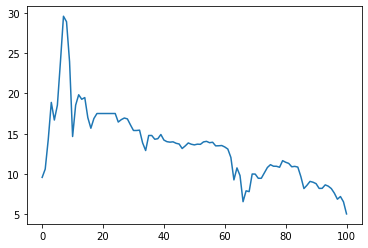

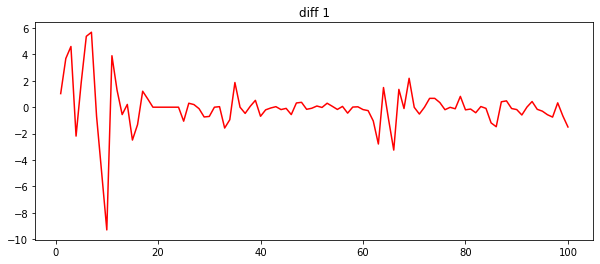

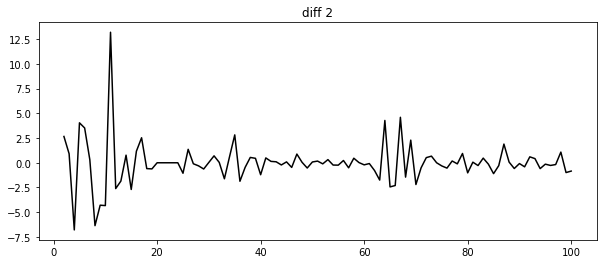

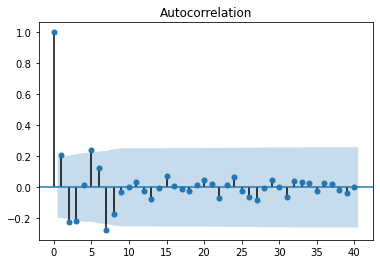

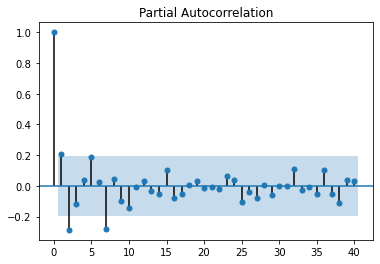

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting h

the AIC is(6, 2),
the BIC is(2, 1)
 the HQIC is(6, 1)


TypeError: cannot unpack non-iterable NoneType object

In [24]:
def string_toDatetime(string):
        return  datetime.datetime.strptime(string, "%Y-%m-%d %H:%M:%S")
     
def ARIMA_model(train_H,train,test):
        arima_model = ARIMA(train,order =(1,1,1)) #ARIMA模型
        result = arima_model.fit()
        #print(result.summary()) #给出一份模型报告
        ########得到训练集的预测时间序列#########
        pred = result.predict()
        
        #######还原#########
        ##2018-8-1 00:00 到 2018-9-1 00:00 ###
        #将差分后的序列还原,pred_restored为还原之后
        idx = pd.date_range(string_toDatetime('2018-8-1 00:00:00'),periods=len(pred[4:20]),freq='D')
        pred_list= []
        for i in range(len(pred[4:20])):
            pred_list.append(np.array(pred)[i+4])
        pred_numpy = pd.Series(np.array(pred_list),index=idx)    
        
        pred_restored = pd.Series(np.array(train_H)[5][0], index=[train_H.index[5]]).append(pred_numpy).cumsum()
        x1 = np.array(pred_restored)
        x2 = np.array(train_H[5:22])
        y = []
        for i in range(len(pred_restored)):
            y.append(i+1)
        y = np.array(y)
        fig1 = plt.figure(num=2, figsize=(10,4),dpi=80)
        plt.plot(y,x1,color='blue')
        plt.plot(y,x2,color='red')
        plt.ylim(0,0.8)
        plt.show()
        pred_restored = pd.Series(np.array(train_H)[5][0],\
             index=[train_H.index[5]]).append(pred_numpy).cumsum()
        
def stationarity(timeseries): #Stationary treatment
    #Finite difference, and drop none value
    diff1 = timeseries.diff(1).dropna() 
    diff2 = diff1.diff(1) 
    
    diff1.plot(color = 'red',title='diff 1',figsize=(10,4))
    plt.show()
    diff2.plot(color = 'black',title='diff 2',figsize=(10,4))
    plt.show()
    return diff1

     
def determinate_order(timeseries): 
    plot_acf(timeseries,lags=40) 
    plot_pacf(timeseries,lags=40)
    plt.show()    
    
    AIC = sm.tsa.arma_order_select_ic(timeseries,max_ar = 6,max_ma=4,ic='aic')['aic_min_order']
    #BIC
    BIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
           max_ma=4,ic='bic')['bic_min_order']
    #HQIC
    HQIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
                 max_ma=4,ic='hqic')['hqic_min_order']
    print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))
    
    
def preprocess_data():
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    train = priced_bitcoin.loc[0:100, 'price']
    test = priced_bitcoin.loc[101, 'price']
    plt.plot(train)
    plt.show()

    return train,test
        
        
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    train, test = preprocess_data()
    train_finite = stationarity(train)
    determinate_order(train_finite)
    

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = range(1,31)
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in range(1, 31):
            print("PREDICTION_HORIZON: ", prediction_horizon)
            train_input, train_target, test_input, test_target, train_days, test_days = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
        plt.plot(rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()


IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  2


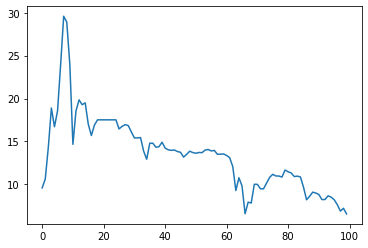

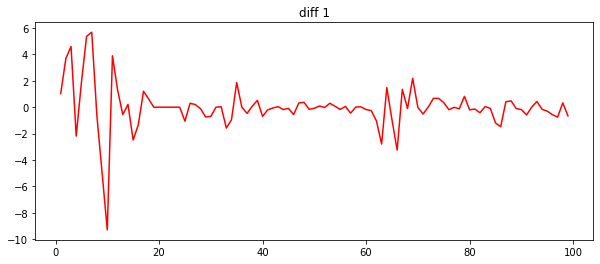

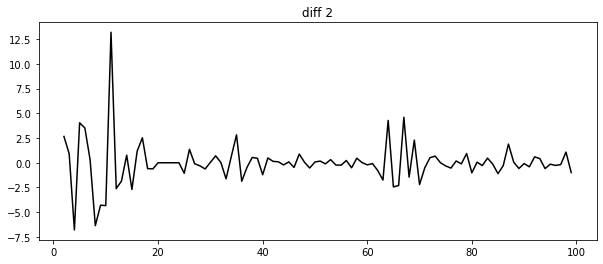

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  3


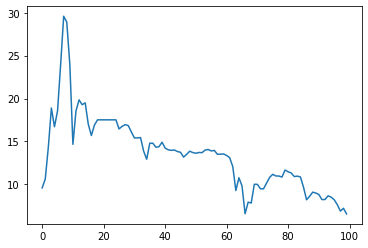

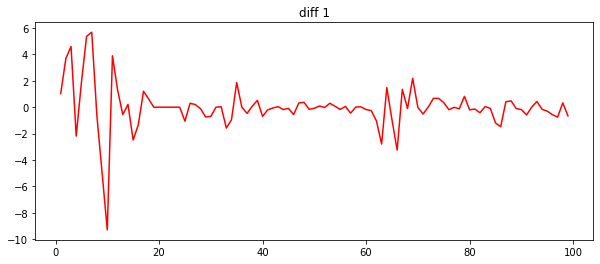

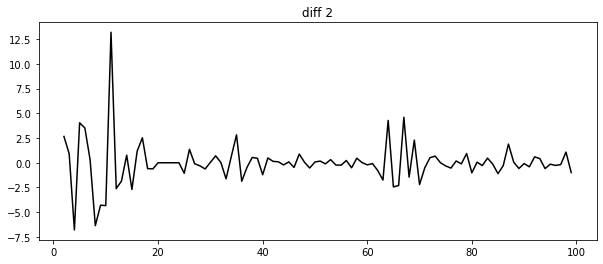

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.86


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.86] <class 'numpy.ndarray'>
标准差为28.356470042115934
PREDICTION_HORIZON:  4


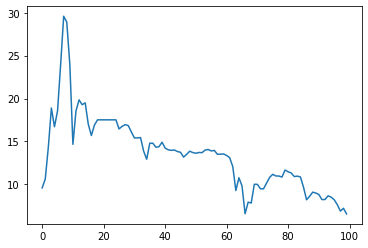

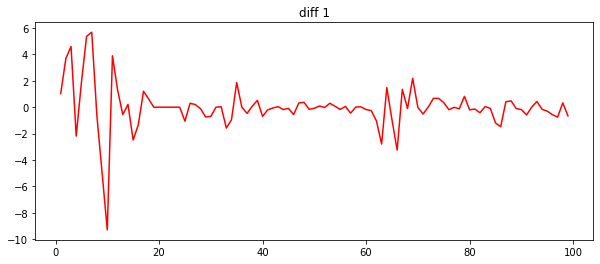

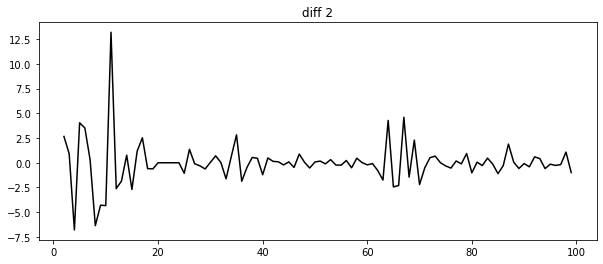

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.08
pred_one [0.53492065] <class 'numpy.ndarray'>
[6.08] <class 'numpy.ndarray'>
标准差为30.747904954393935
PREDICTION_HORIZON:  5


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


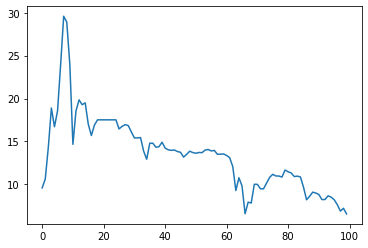

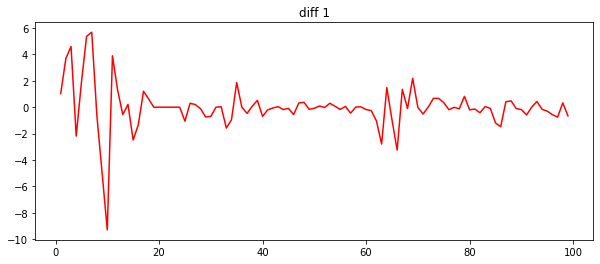

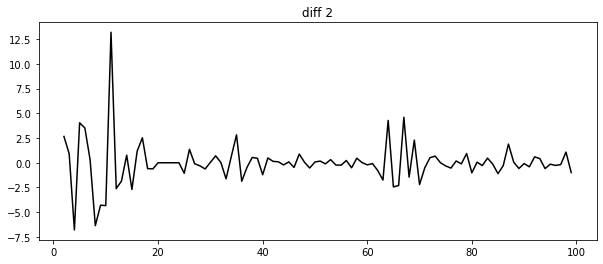

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.8
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.8] <class 'numpy.ndarray'>
标准差为27.72106052058556
PREDICTION_HORIZON:  6


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


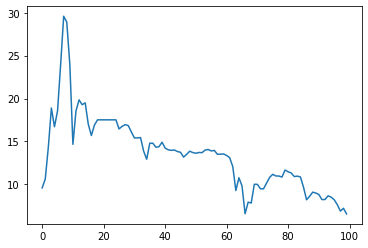

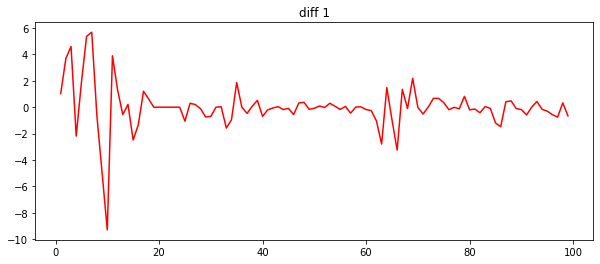

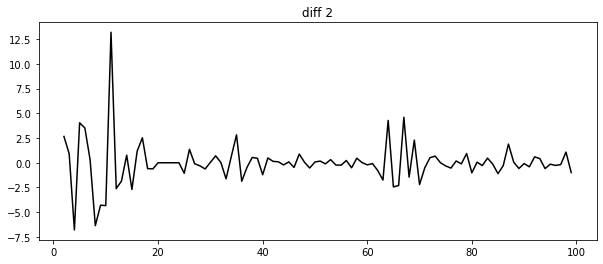

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.62
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.62] <class 'numpy.ndarray'>
标准差为25.858031955994463
PREDICTION_HORIZON:  7


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


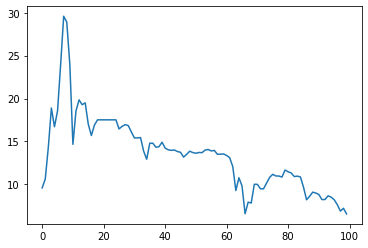

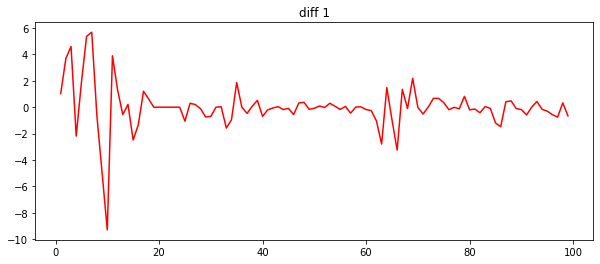

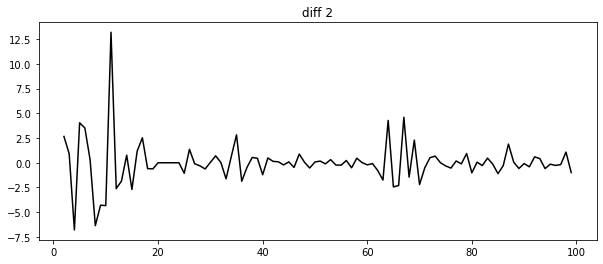

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.84
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.84] <class 'numpy.ndarray'>
标准差为18.533708176099672
PREDICTION_HORIZON:  8


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


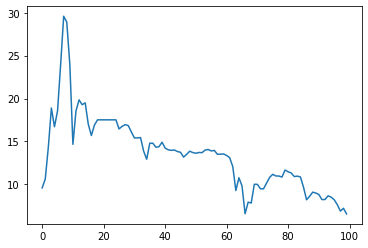

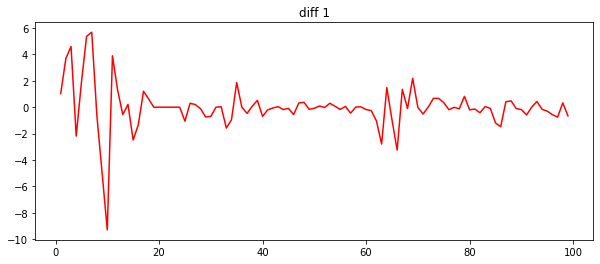

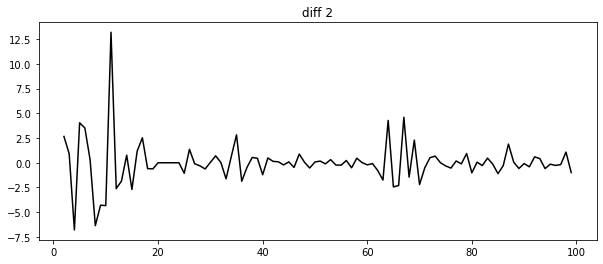

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.82


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.82] <class 'numpy.ndarray'>
标准差为18.36190500225622
PREDICTION_HORIZON:  9


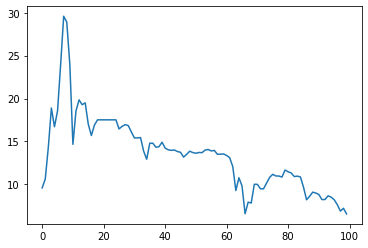

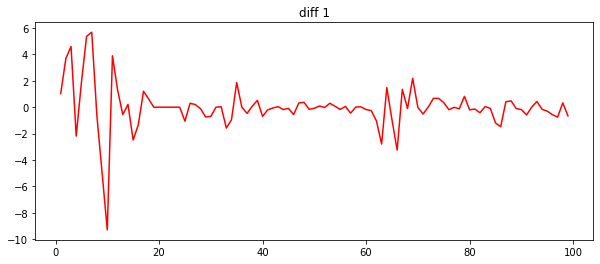

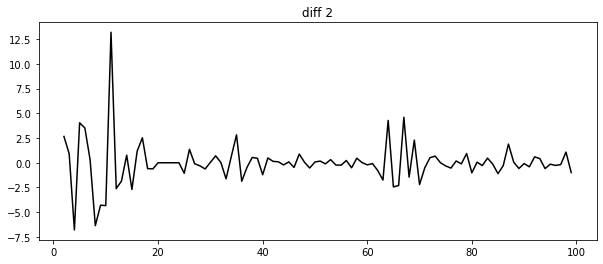

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  10


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


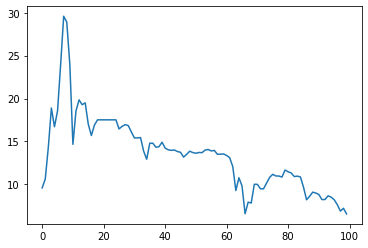

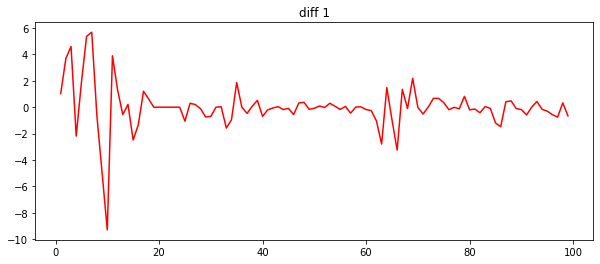

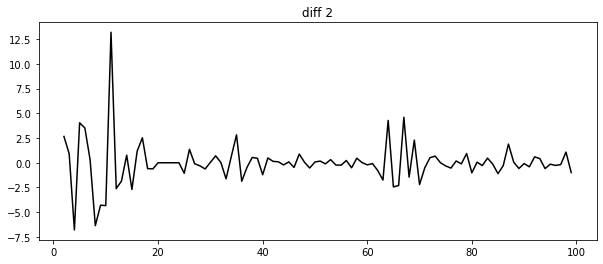

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.2


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.2] <class 'numpy.ndarray'>
标准差为21.762965305281888
PREDICTION_HORIZON:  11


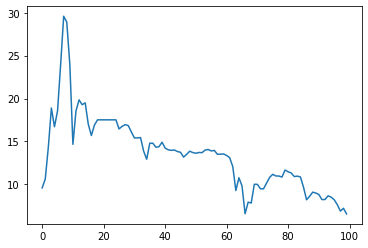

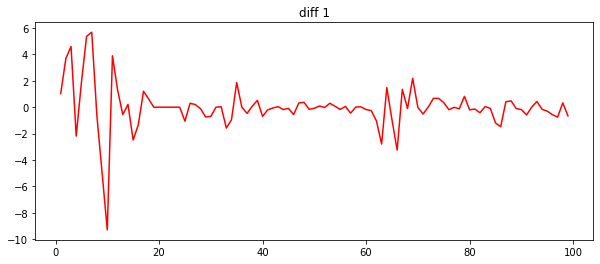

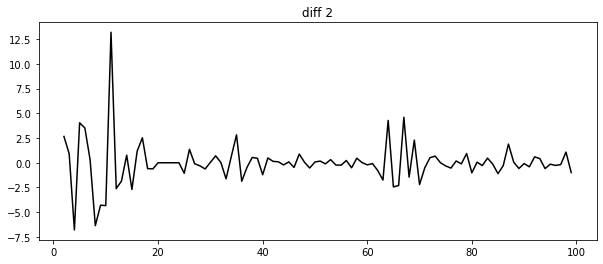

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.46


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.46] <class 'numpy.ndarray'>
标准差为24.256406565246813
PREDICTION_HORIZON:  12


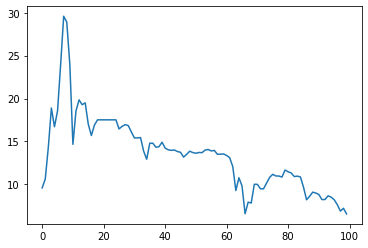

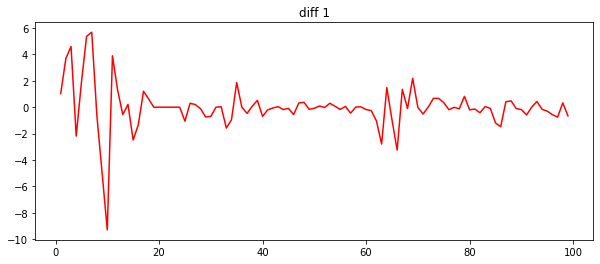

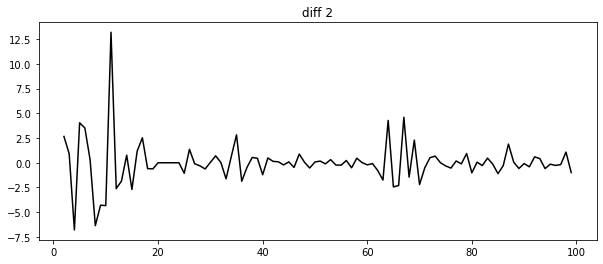

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.11
pred_one [0.53492065] <class 'numpy.ndarray'>
[6.11] <class 'numpy.ndarray'>
标准差为31.081509715159132
PREDICTION_HORIZON:  13


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


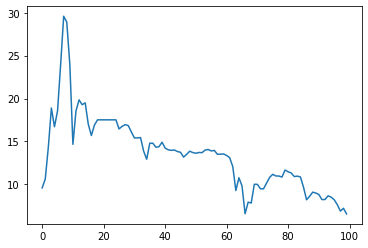

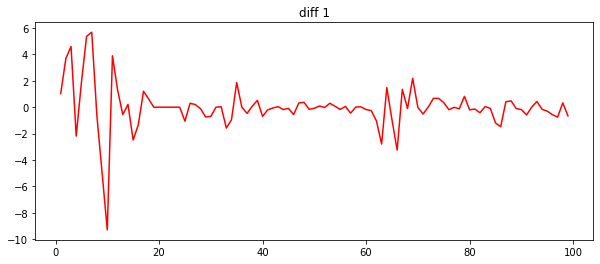

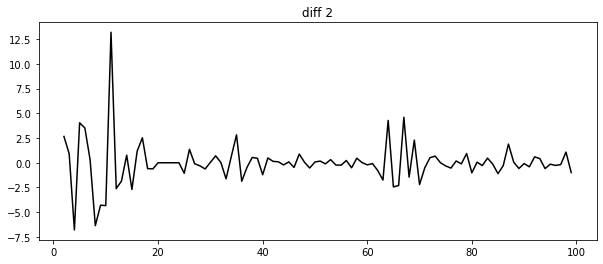

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.61
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.61] <class 'numpy.ndarray'>
标准差为25.756430369072735
PREDICTION_HORIZON:  14


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


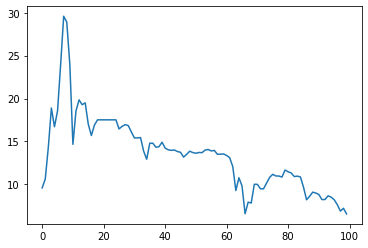

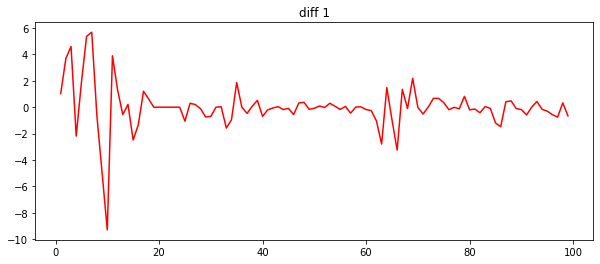

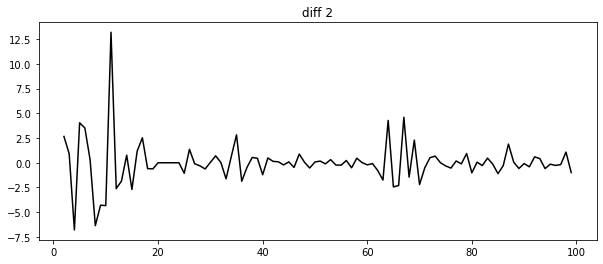

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.43
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.43] <class 'numpy.ndarray'>
标准差为23.961801804481617
PREDICTION_HORIZON:  15


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


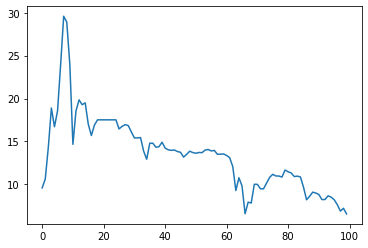

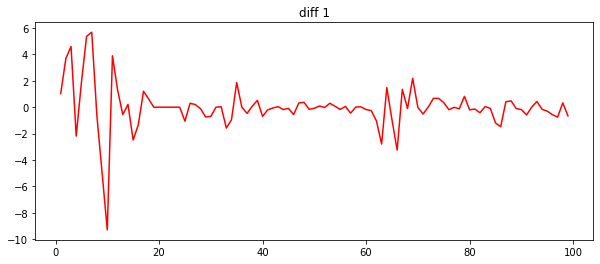

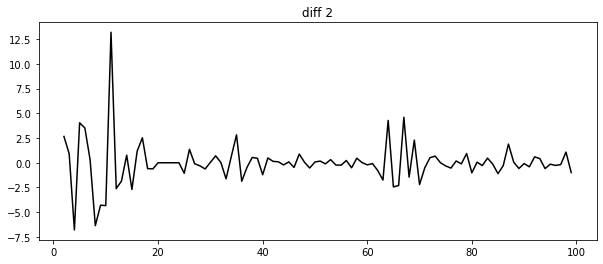

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.55


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.55] <class 'numpy.ndarray'>
标准差为25.151020847542362
PREDICTION_HORIZON:  16


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


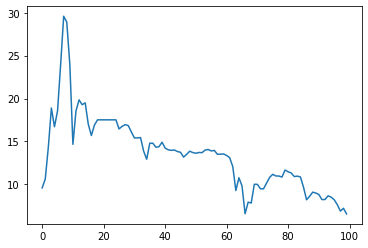

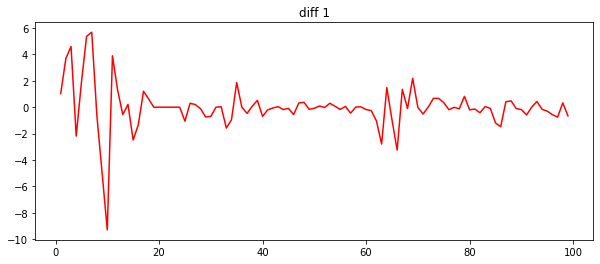

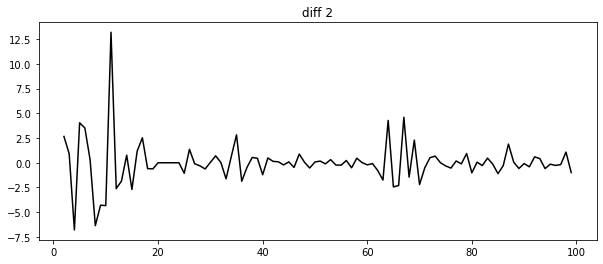

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.47


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.47] <class 'numpy.ndarray'>
标准差为24.355008152168537
PREDICTION_HORIZON:  17


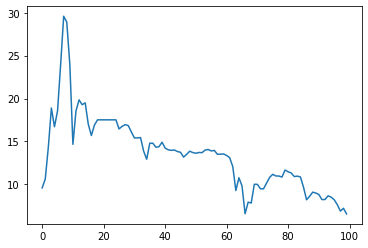

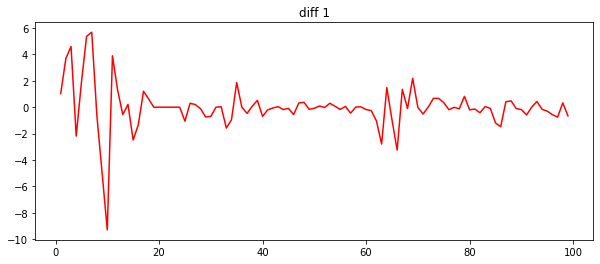

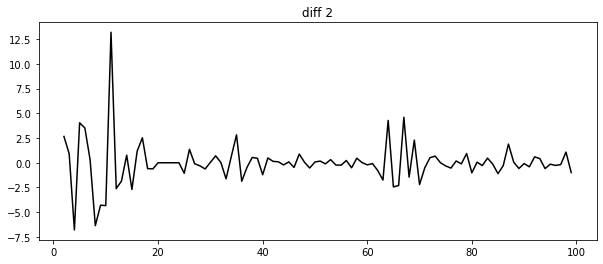

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.33
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.33] <class 'numpy.ndarray'>
标准差为22.99278593526434
PREDICTION_HORIZON:  18


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


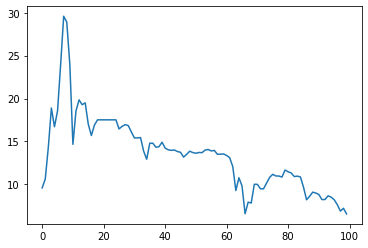

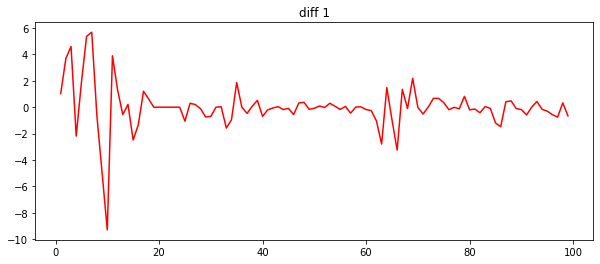

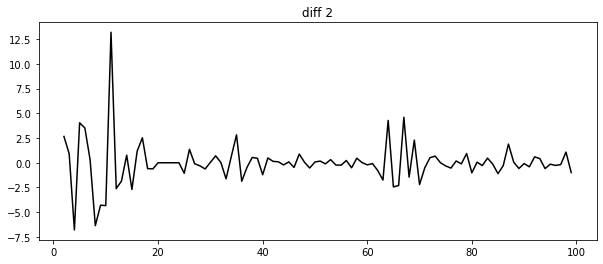

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  19


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


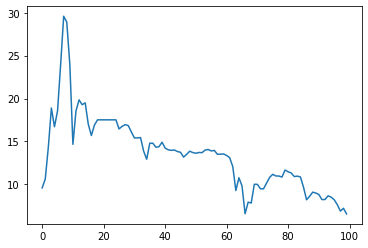

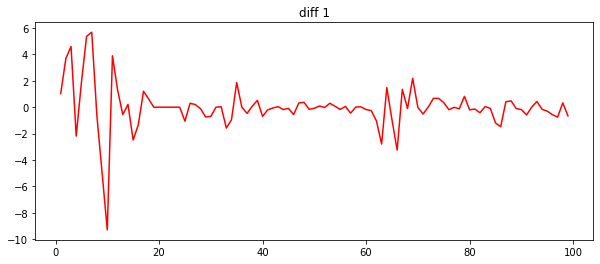

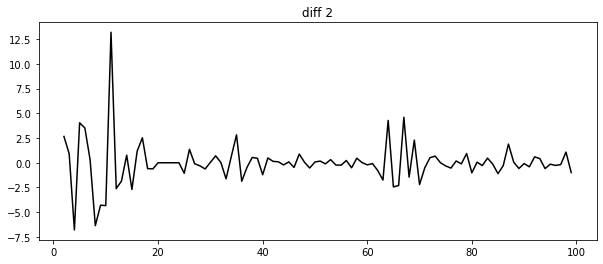

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.92
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.92] <class 'numpy.ndarray'>
标准差为19.228920871473495
PREDICTION_HORIZON:  20


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


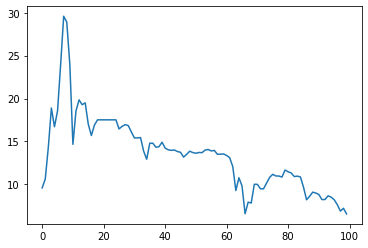

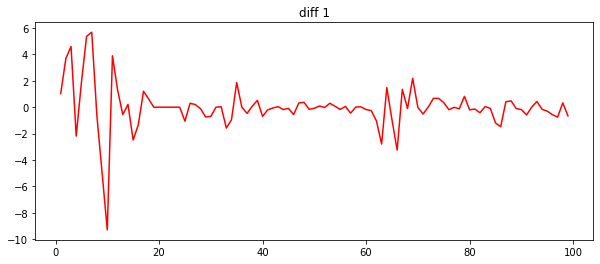

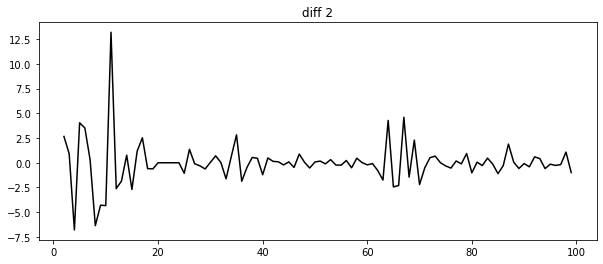

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  21


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


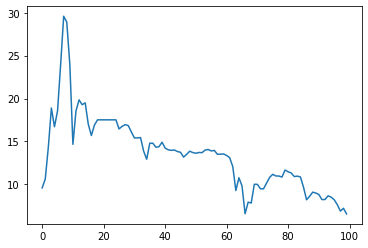

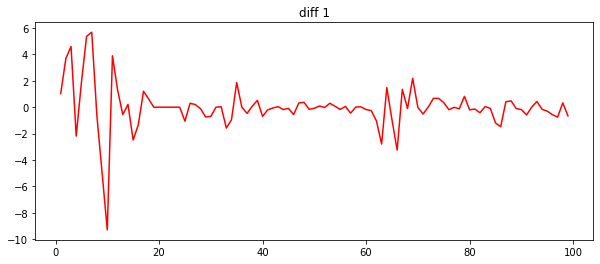

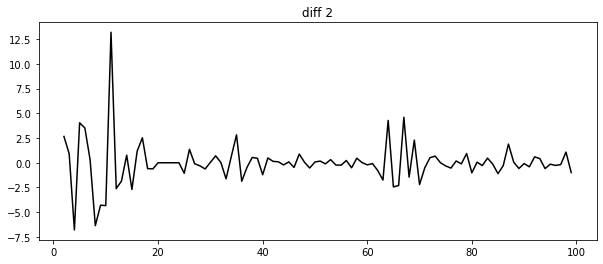

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.78
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.78] <class 'numpy.ndarray'>
标准差为18.020698654569316
PREDICTION_HORIZON:  22


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


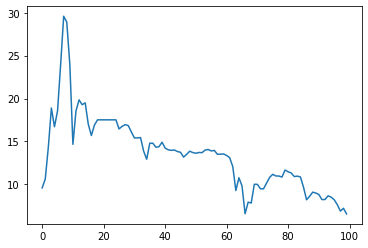

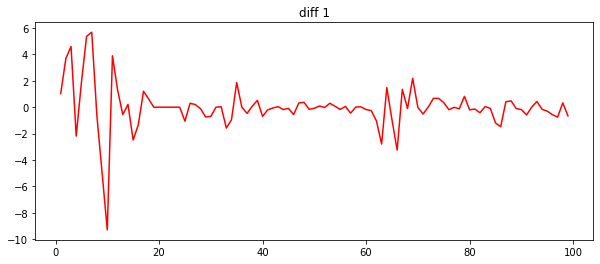

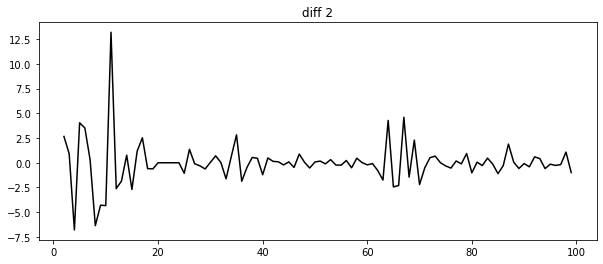

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.14
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.14] <class 'numpy.ndarray'>
标准差为21.206755783751515
PREDICTION_HORIZON:  23


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


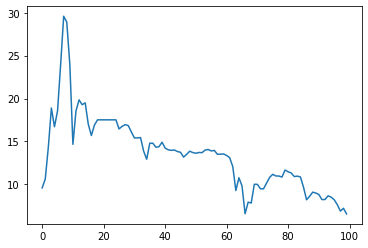

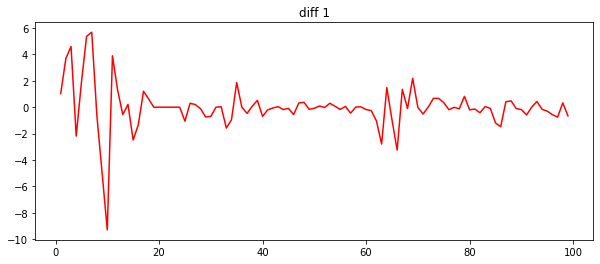

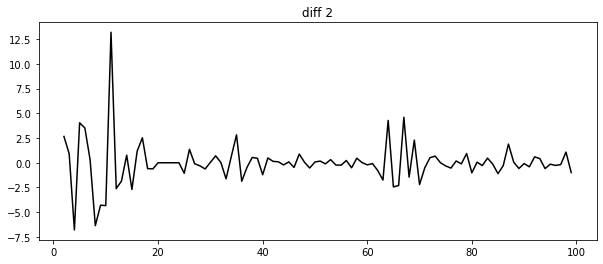

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  24


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


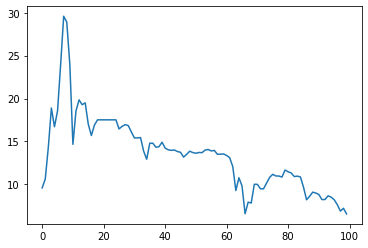

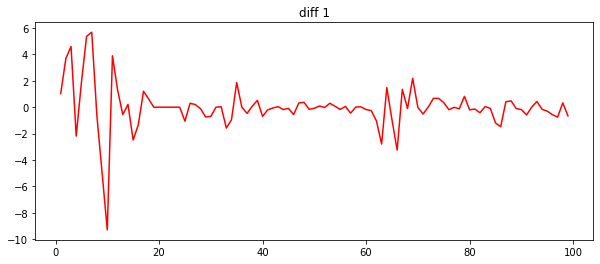

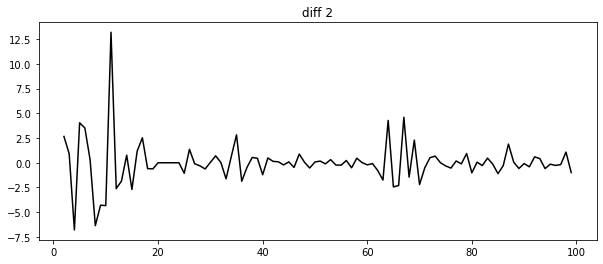

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  25


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


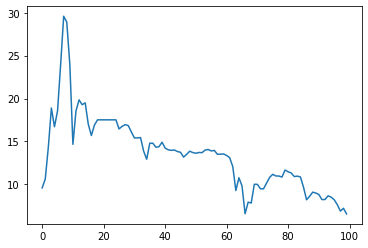

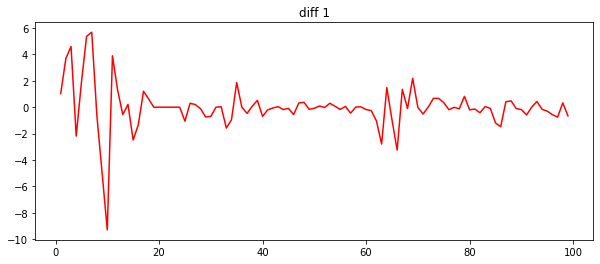

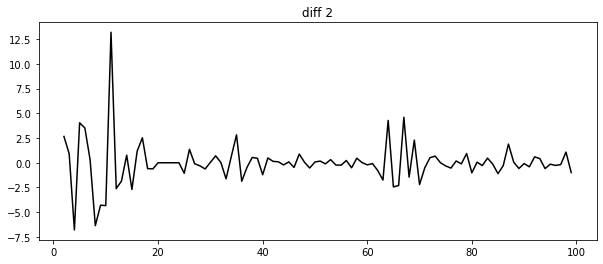

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.02
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.02] <class 'numpy.ndarray'>
标准差为20.11593674069077
PREDICTION_HORIZON:  26


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


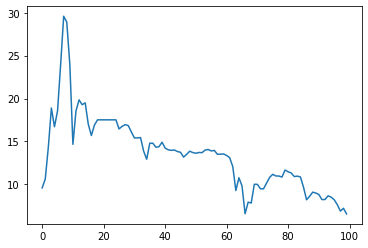

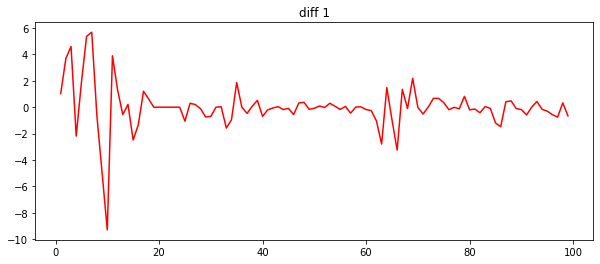

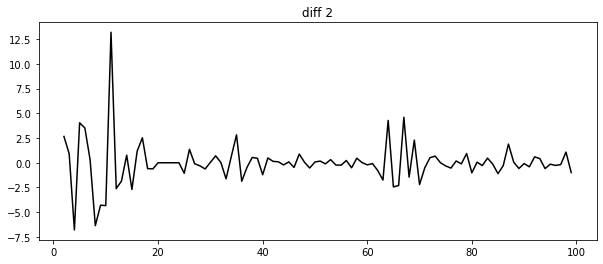

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.96
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.96] <class 'numpy.ndarray'>
标准差为19.581327219160414
PREDICTION_HORIZON:  27


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


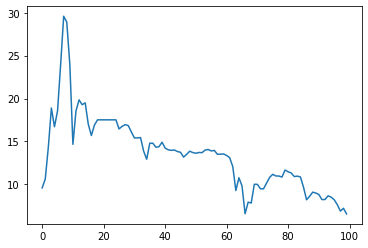

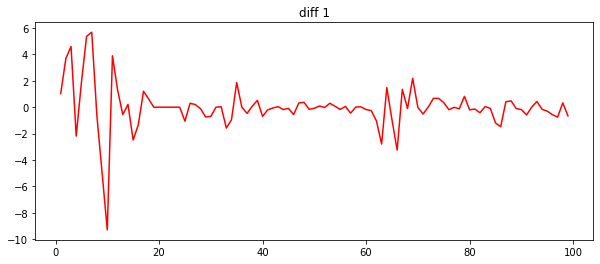

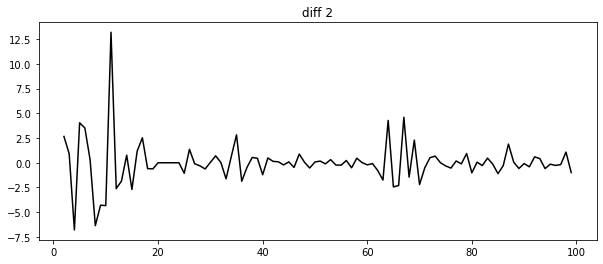

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  28


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


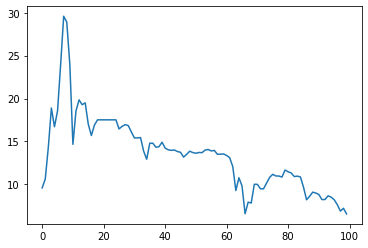

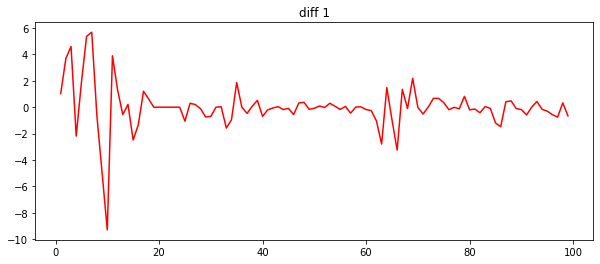

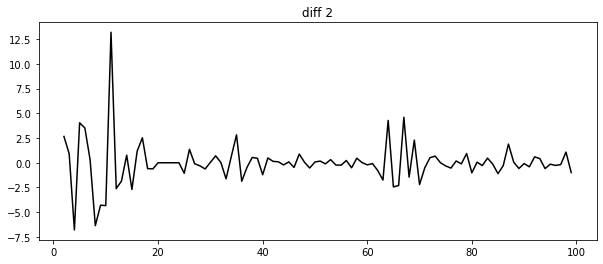

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.73
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.73] <class 'numpy.ndarray'>
标准差为17.59869071996067
PREDICTION_HORIZON:  29


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


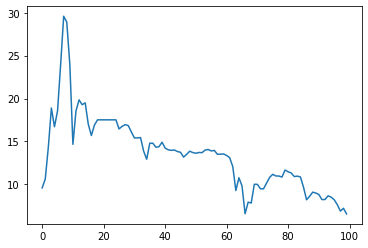

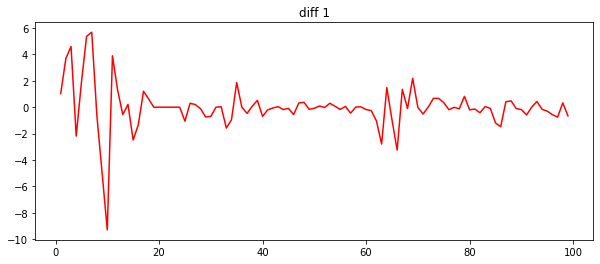

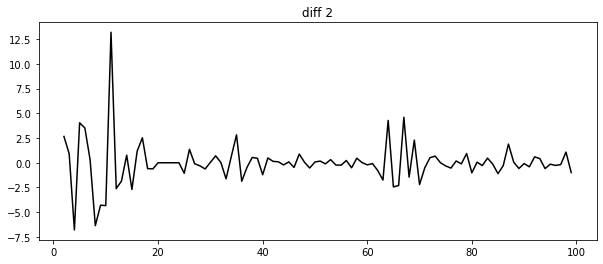

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.27
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.27] <class 'numpy.ndarray'>
标准差为13.950817721561181
PREDICTION_HORIZON:  30


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


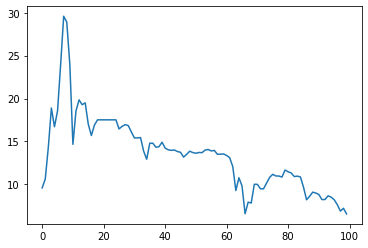

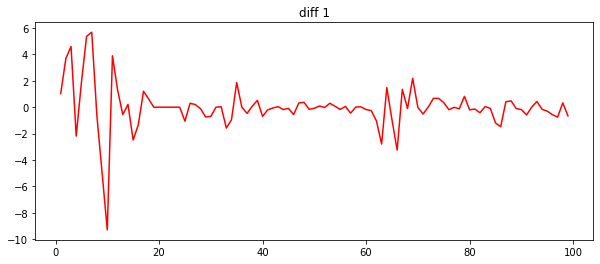

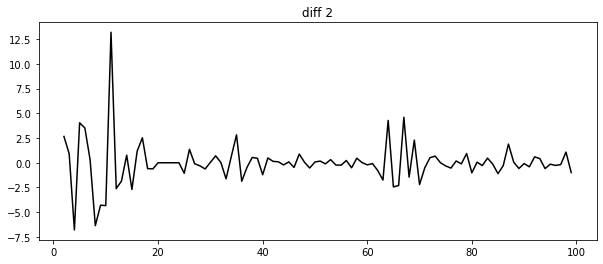

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.01
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.01] <class 'numpy.ndarray'>
标准差为12.076176461596257


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


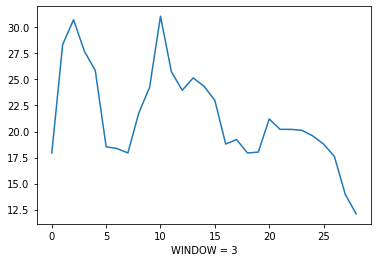

WINDOW_SIZE:  5
PREDICTION_HORIZON:  2


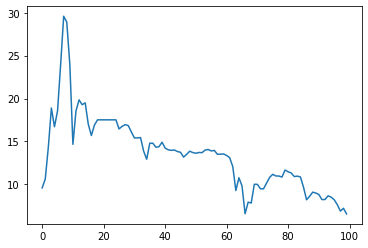

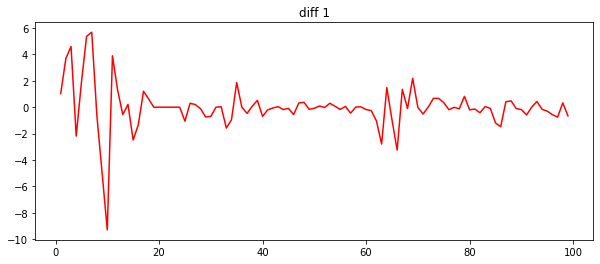

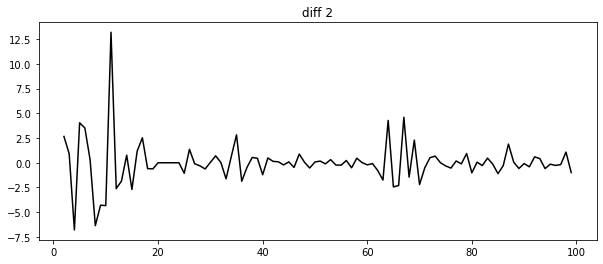

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  3


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


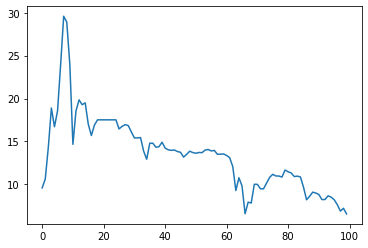

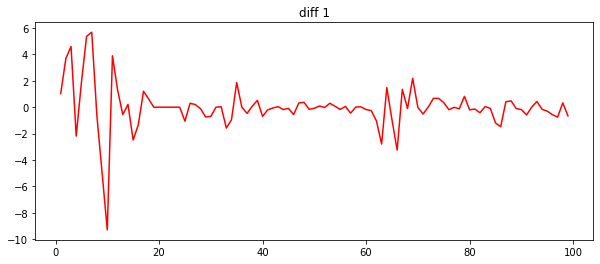

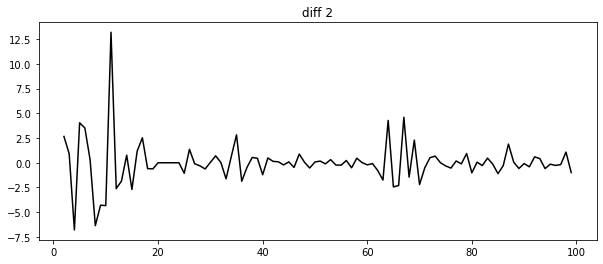

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.86
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.86] <class 'numpy.ndarray'>
标准差为28.356470042115934
PREDICTION_HORIZON:  4


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


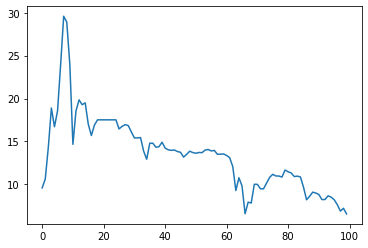

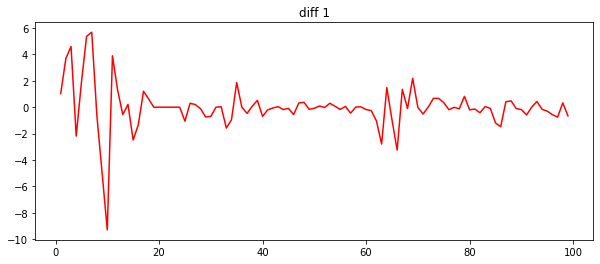

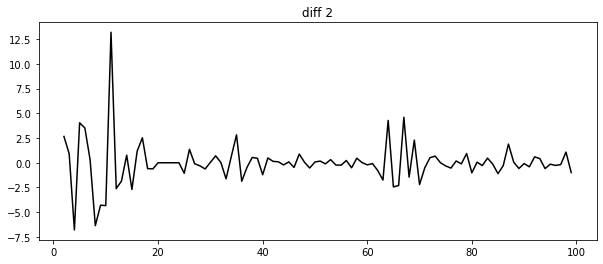

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.08
pred_one [0.53492065] <class 'numpy.ndarray'>
[6.08] <class 'numpy.ndarray'>
标准差为30.747904954393935
PREDICTION_HORIZON:  5


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


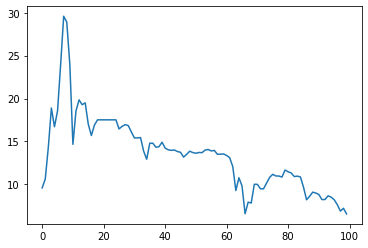

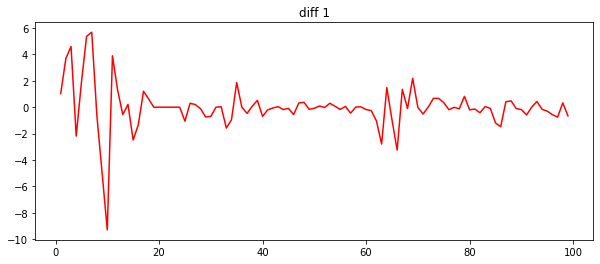

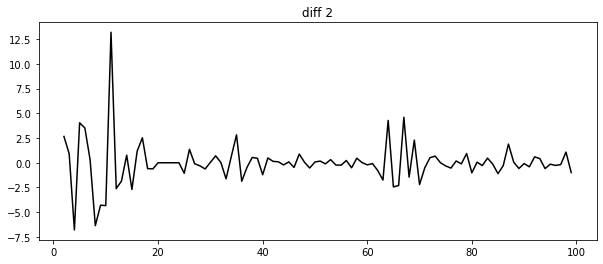

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.8
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.8] <class 'numpy.ndarray'>
标准差为27.72106052058556
PREDICTION_HORIZON:  6


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


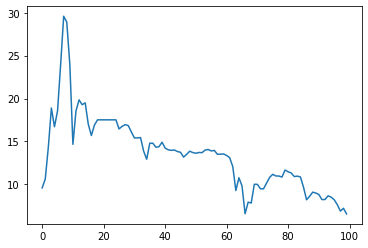

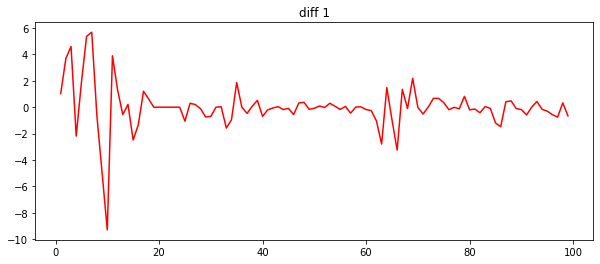

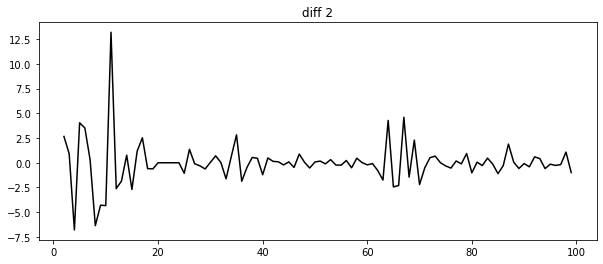

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.62
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.62] <class 'numpy.ndarray'>
标准差为25.858031955994463
PREDICTION_HORIZON:  7


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


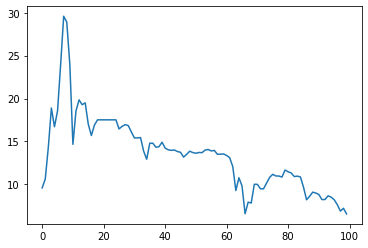

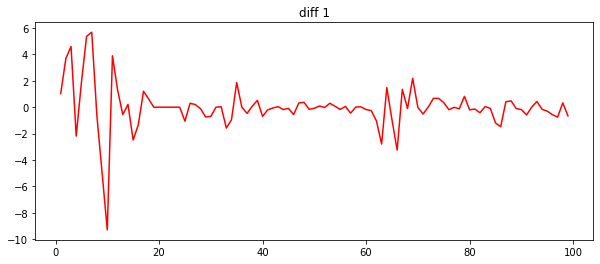

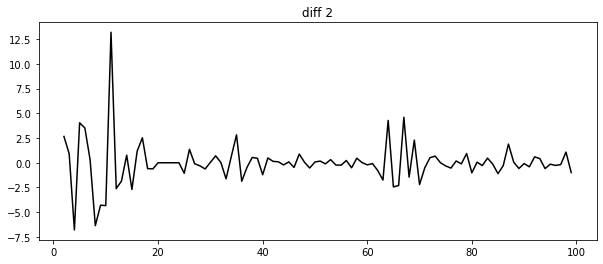

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.84
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.84] <class 'numpy.ndarray'>
标准差为18.533708176099672
PREDICTION_HORIZON:  8


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


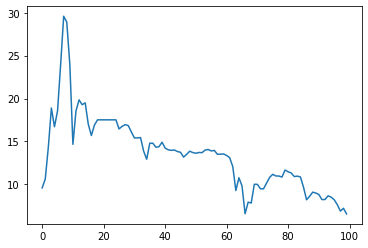

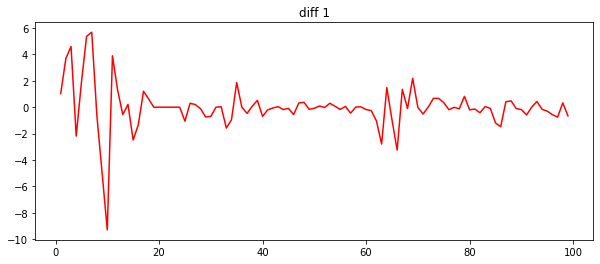

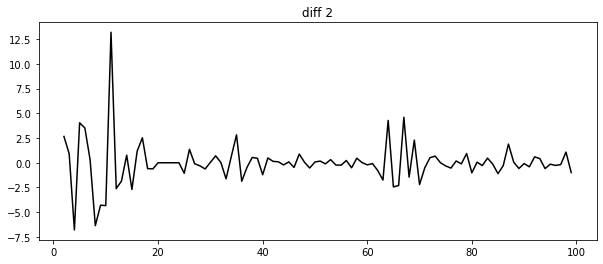

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.82
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.82] <class 'numpy.ndarray'>
标准差为18.36190500225622
PREDICTION_HORIZON:  9


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


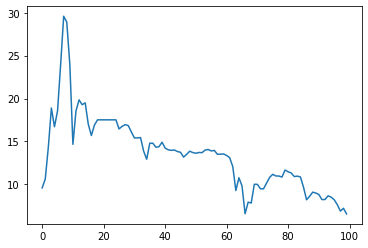

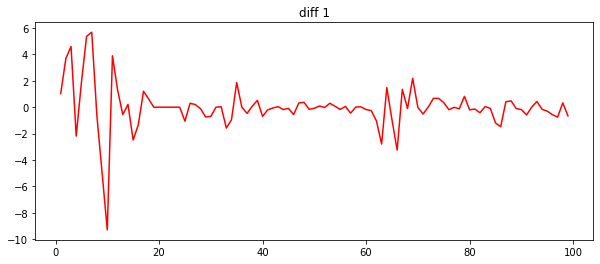

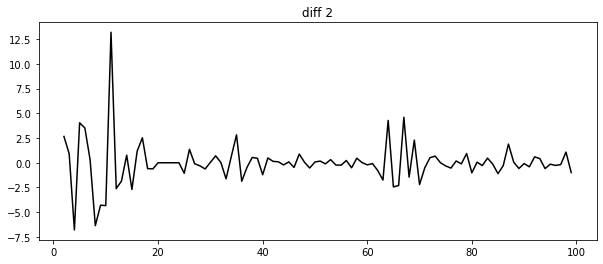

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  10


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


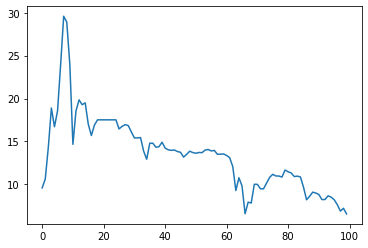

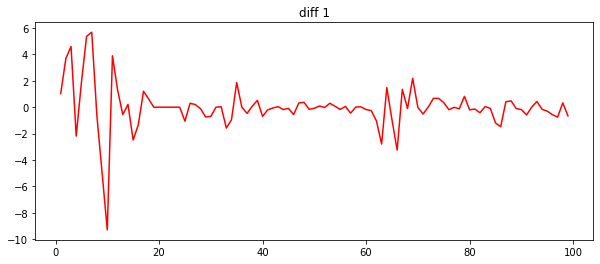

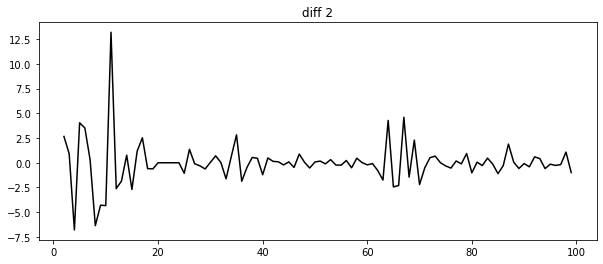

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.2
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.2] <class 'numpy.ndarray'>
标准差为21.762965305281888
PREDICTION_HORIZON:  11


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


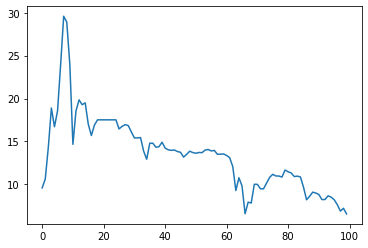

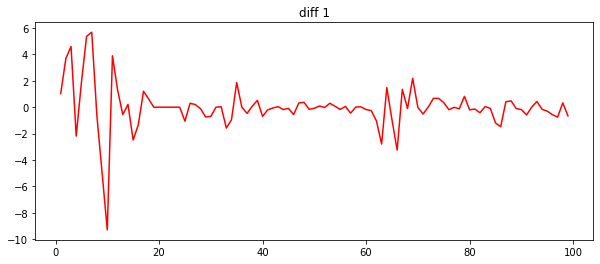

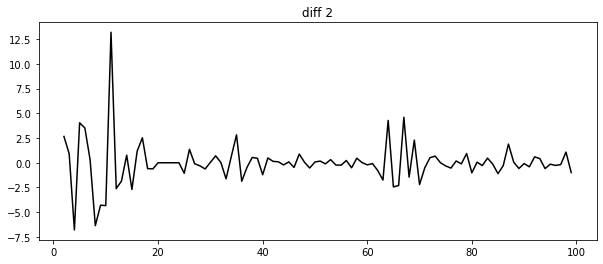

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.46
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.46] <class 'numpy.ndarray'>
标准差为24.256406565246813
PREDICTION_HORIZON:  12


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


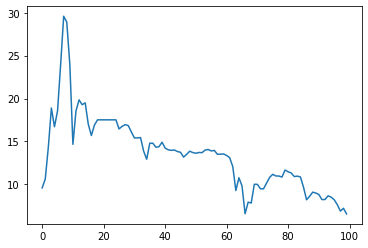

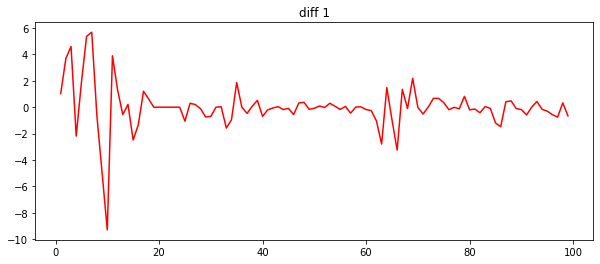

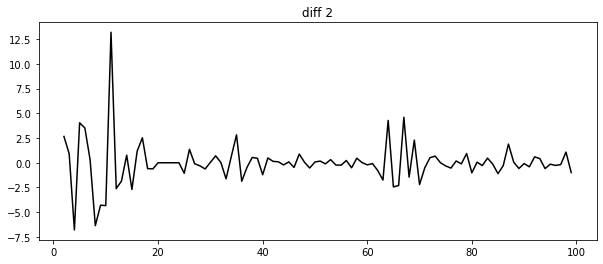

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.11


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[6.11] <class 'numpy.ndarray'>
标准差为31.081509715159132
PREDICTION_HORIZON:  13


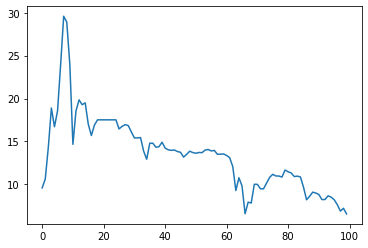

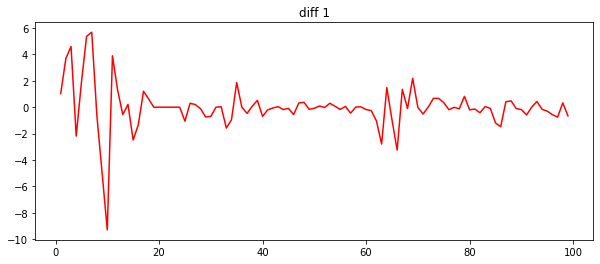

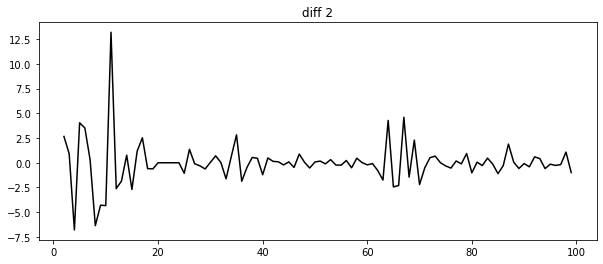

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.61


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.61] <class 'numpy.ndarray'>
标准差为25.756430369072735
PREDICTION_HORIZON:  14


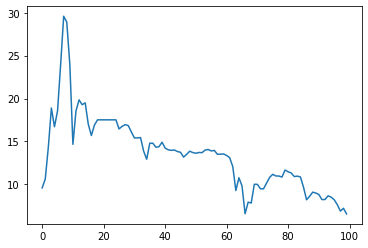

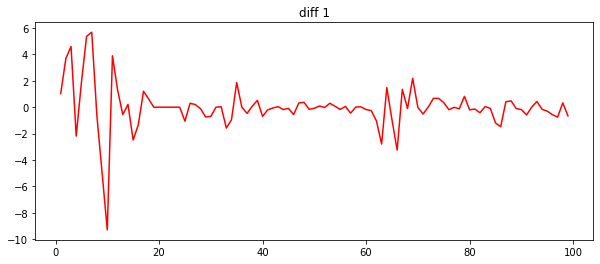

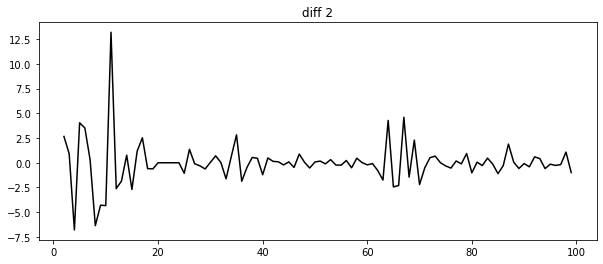

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.43
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.43] <class 'numpy.ndarray'>
标准差为23.961801804481617
PREDICTION_HORIZON:  15


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


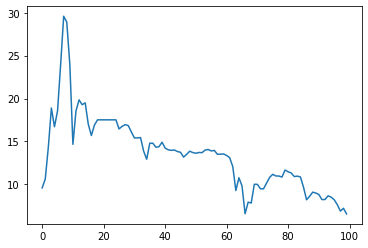

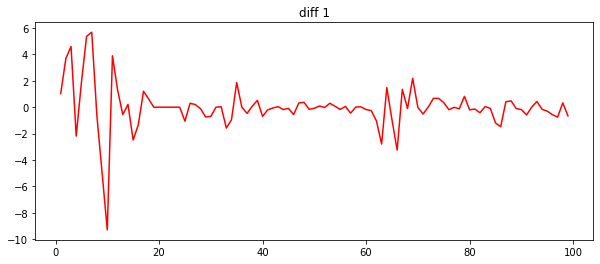

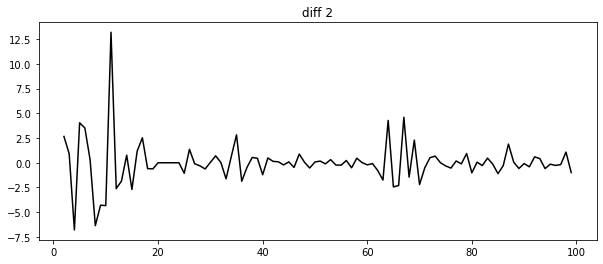

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.55
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.55] <class 'numpy.ndarray'>
标准差为25.151020847542362
PREDICTION_HORIZON:  16


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


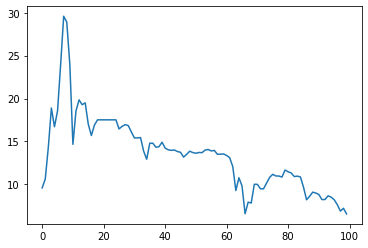

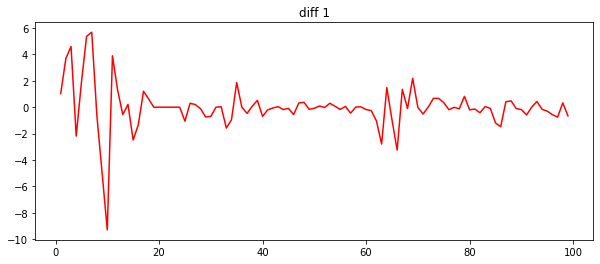

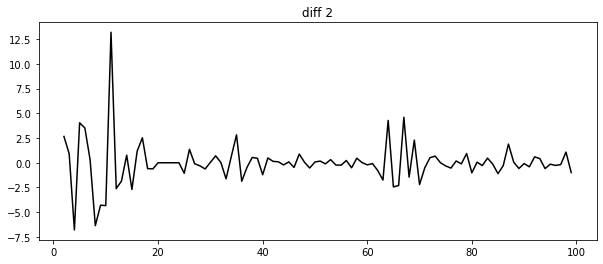

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.47
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.47] <class 'numpy.ndarray'>
标准差为24.355008152168537
PREDICTION_HORIZON:  17


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


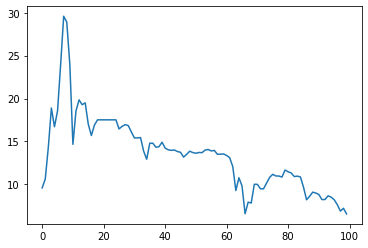

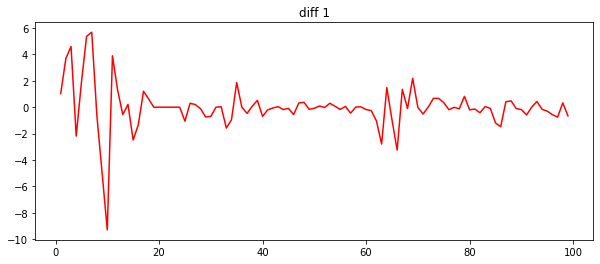

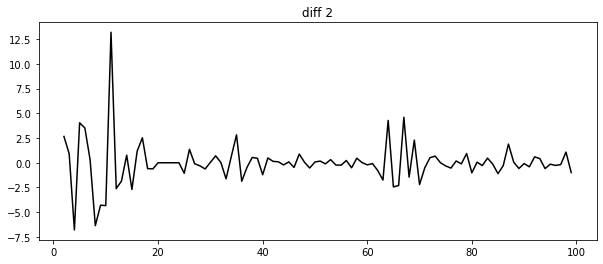

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.33
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.33] <class 'numpy.ndarray'>
标准差为22.99278593526434
PREDICTION_HORIZON:  18


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


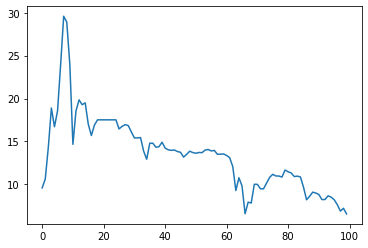

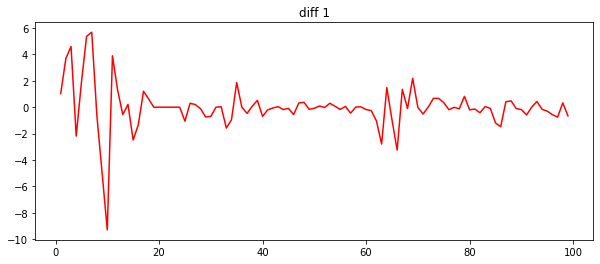

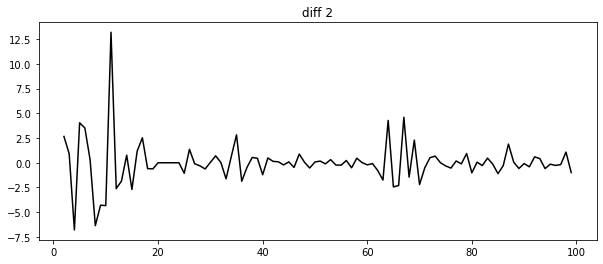

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  19


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


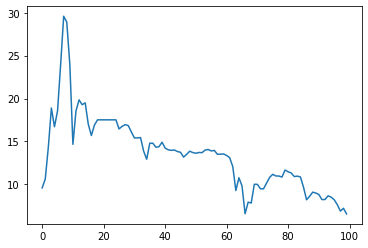

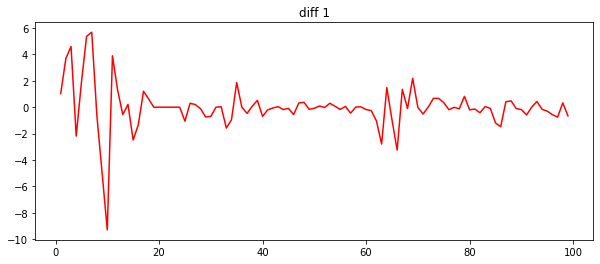

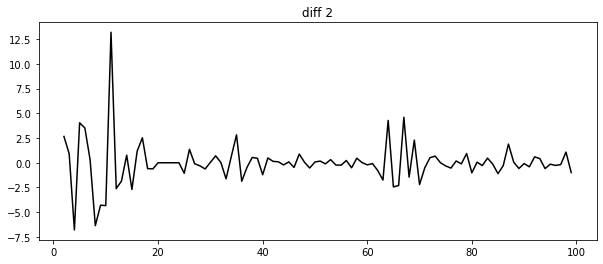

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.92
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.92] <class 'numpy.ndarray'>
标准差为19.228920871473495
PREDICTION_HORIZON:  20


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


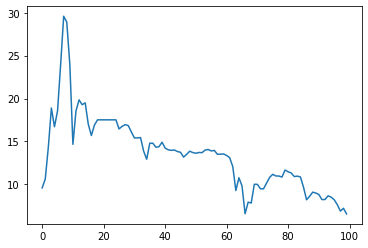

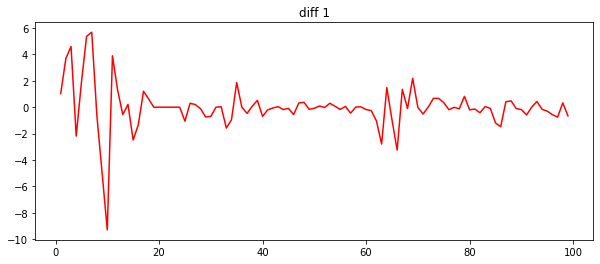

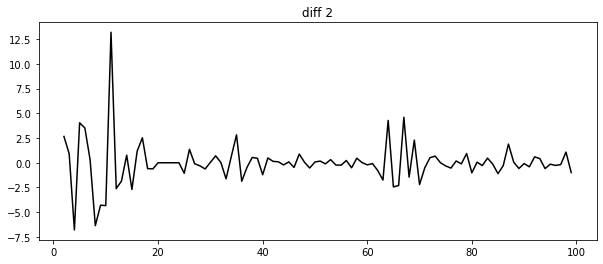

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  21


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


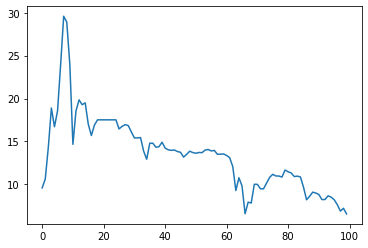

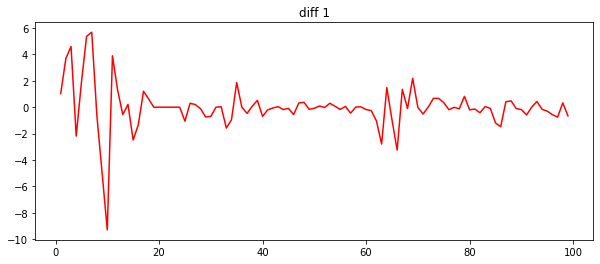

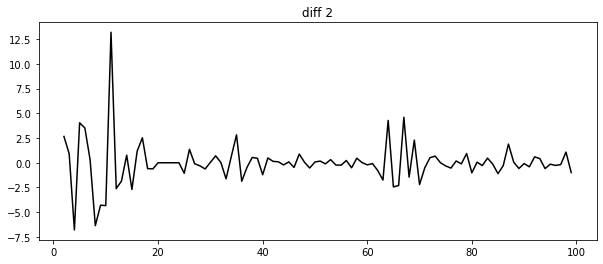

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.78
pred_one [0.53492065]

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


 <class 'numpy.ndarray'>
[4.78] <class 'numpy.ndarray'>
标准差为18.020698654569316
PREDICTION_HORIZON:  22


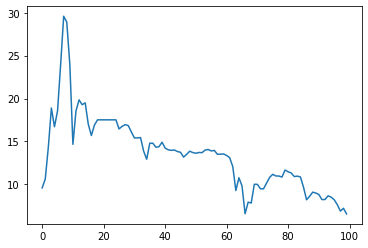

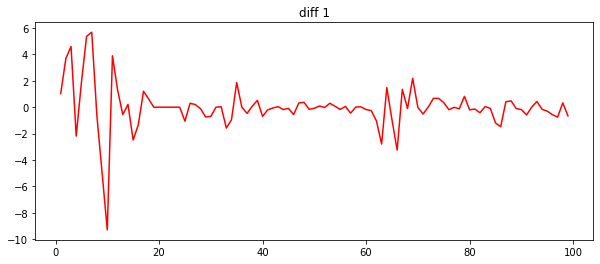

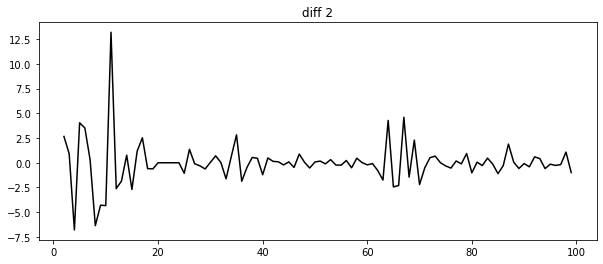

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.14
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.14] <class 'numpy.ndarray'>
标准差为21.206755783751515
PREDICTION_HORIZON:  23


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


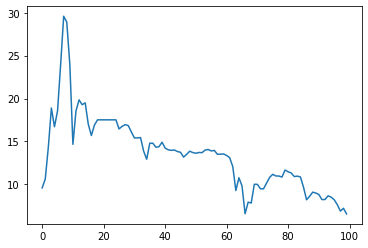

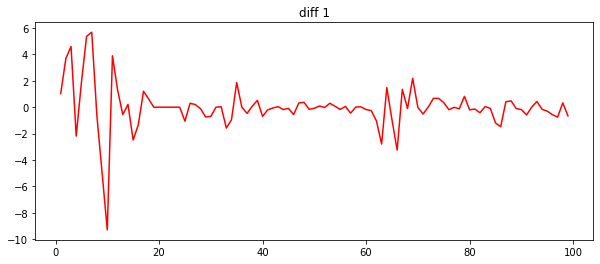

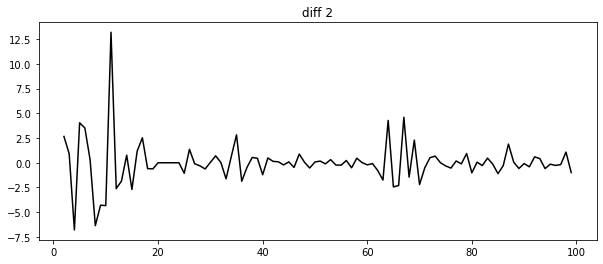

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  24


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


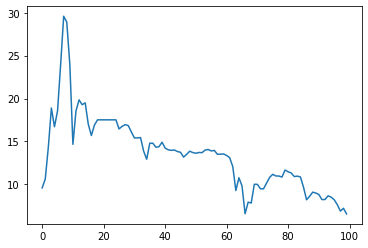

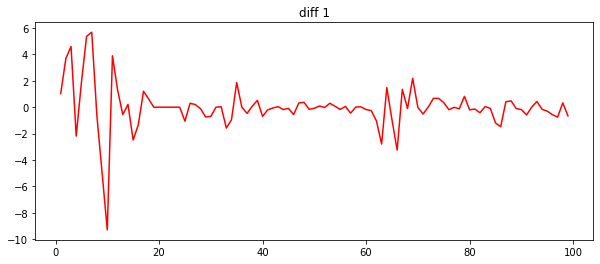

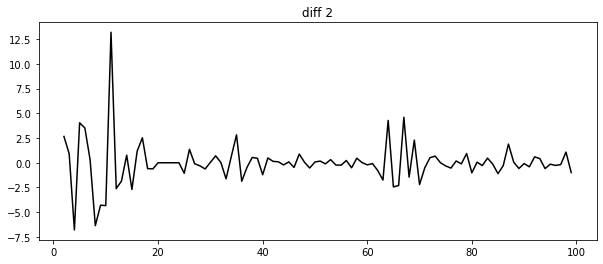

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  25


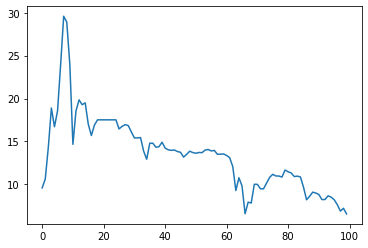

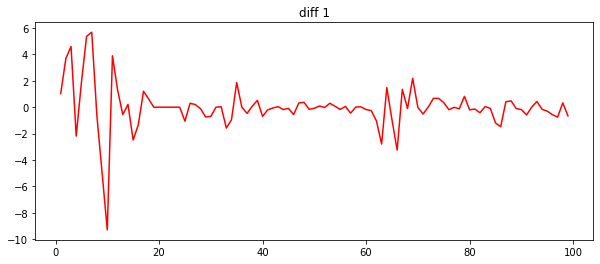

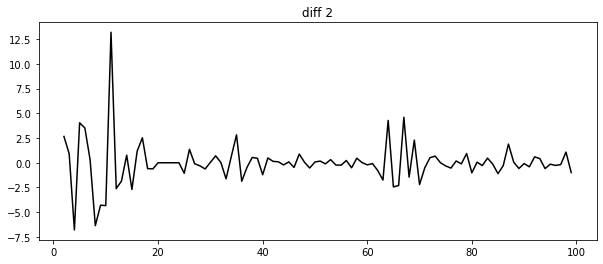

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.02


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.02] <class 'numpy.ndarray'>
标准差为20.11593674069077
PREDICTION_HORIZON:  26


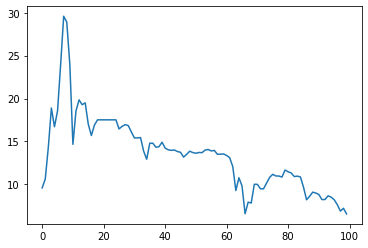

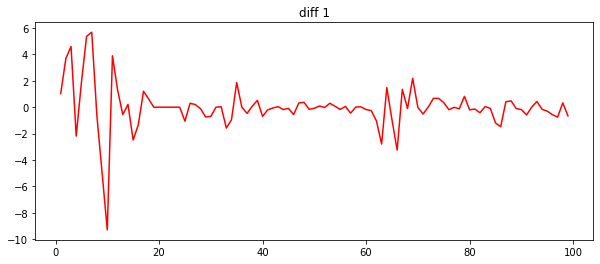

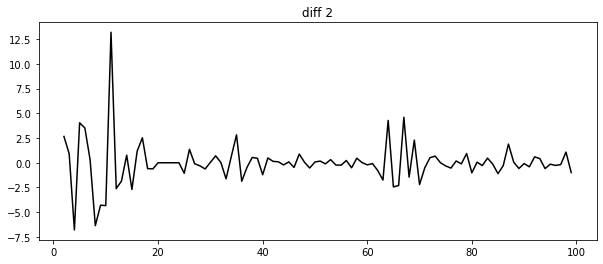

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.96


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.96] <class 'numpy.ndarray'>
标准差为19.581327219160414
PREDICTION_HORIZON:  27


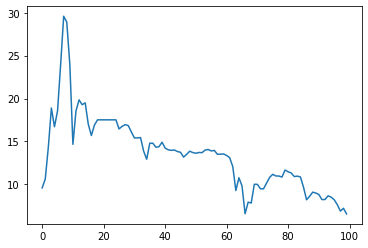

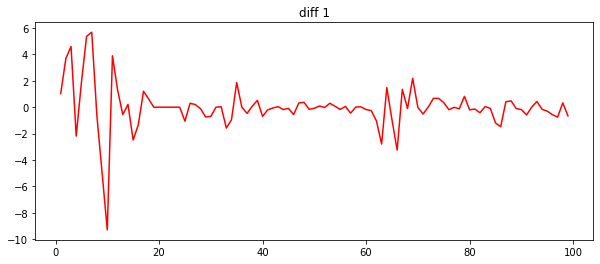

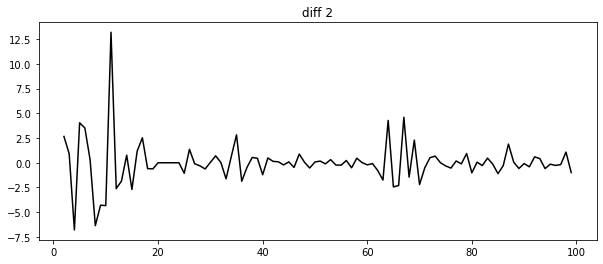

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  28


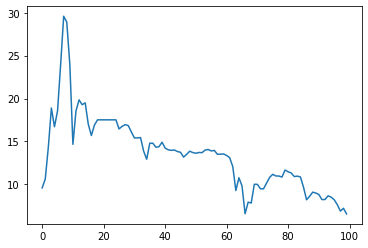

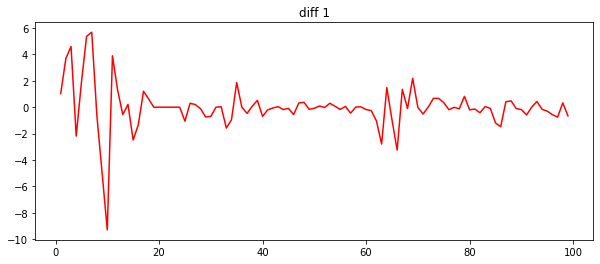

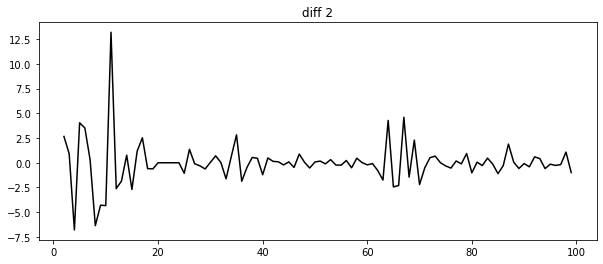

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.73


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.73] <class 'numpy.ndarray'>
标准差为17.59869071996067
PREDICTION_HORIZON:  29


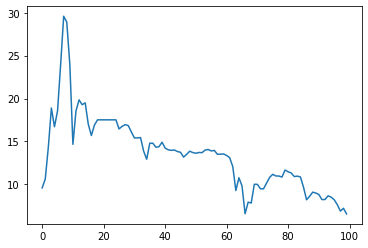

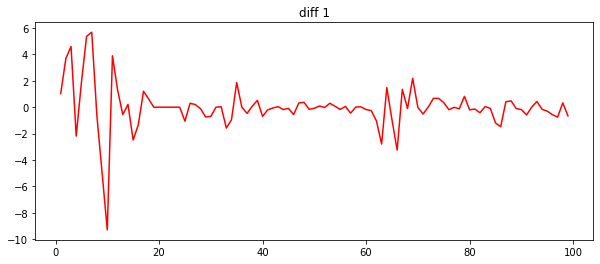

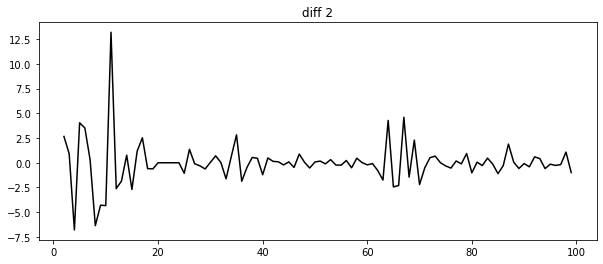

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.27
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.27] <class 'numpy.ndarray'>
标准差为13.950817721561181
PREDICTION_HORIZON:  30


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


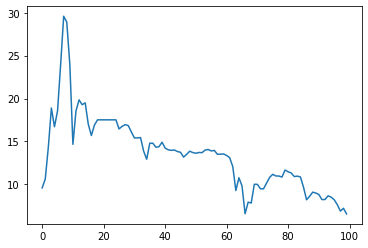

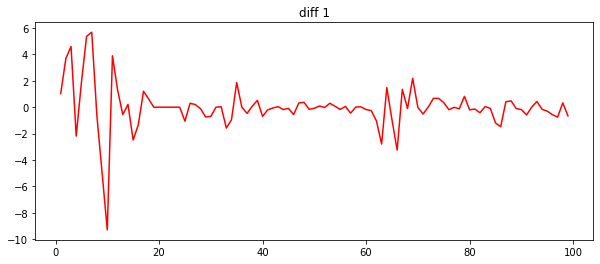

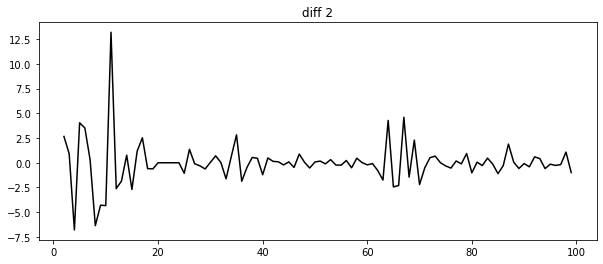

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.01
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.01] <class 'numpy.ndarray'>
标准差为12.076176461596257


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


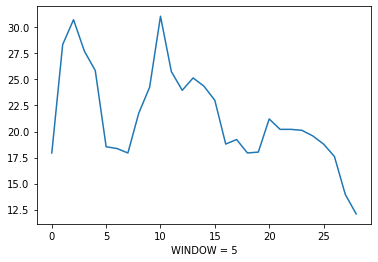

WINDOW_SIZE:  7
PREDICTION_HORIZON:  2


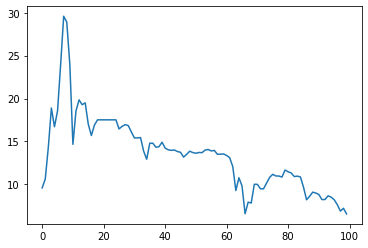

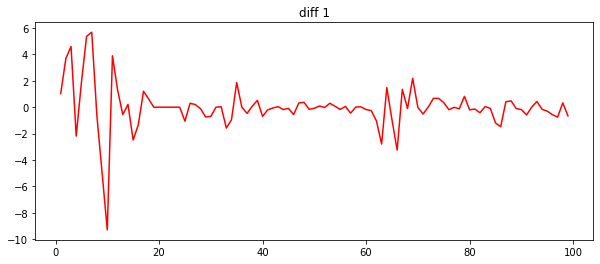

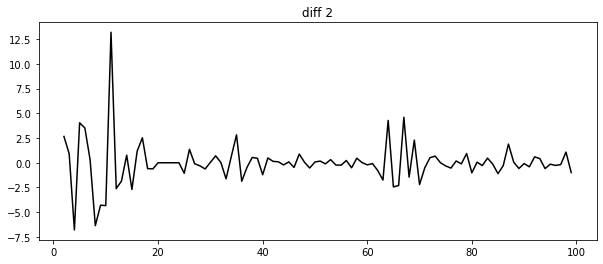

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  3


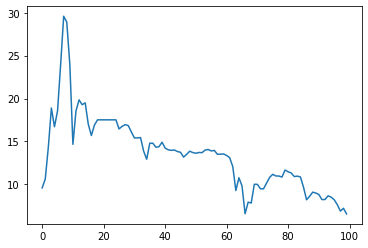

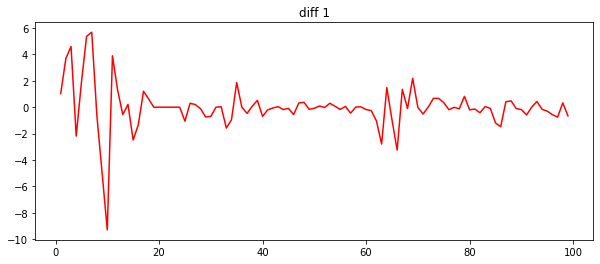

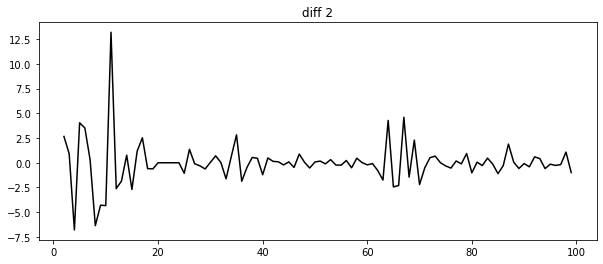

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.86


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.86] <class 'numpy.ndarray'>
标准差为28.356470042115934
PREDICTION_HORIZON:  4


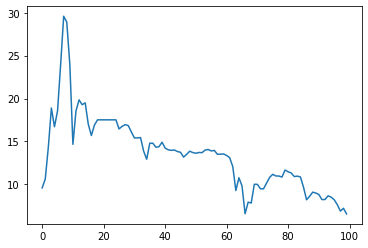

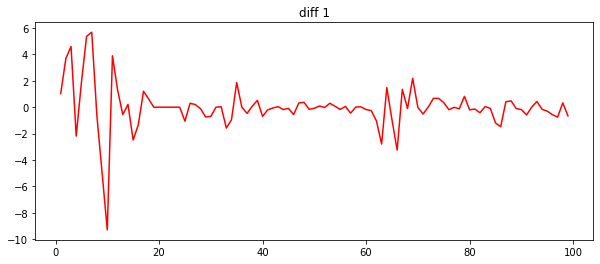

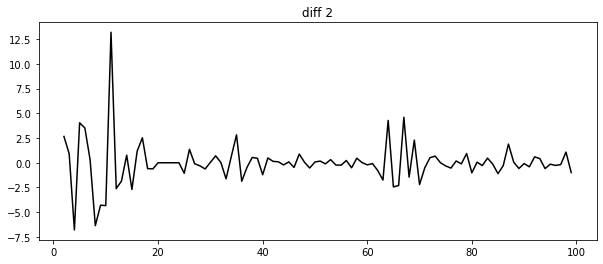

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.08


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[6.08] <class 'numpy.ndarray'>
标准差为30.747904954393935
PREDICTION_HORIZON:  5


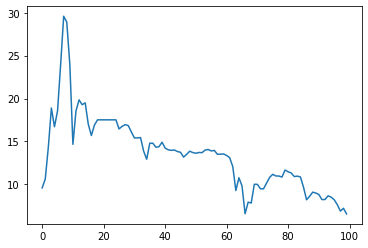

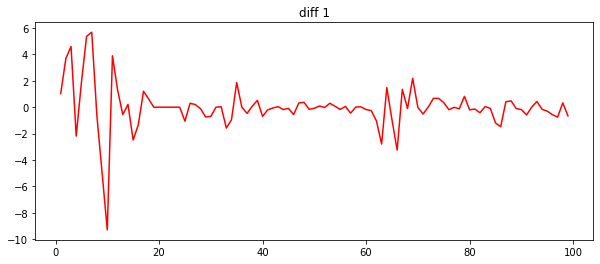

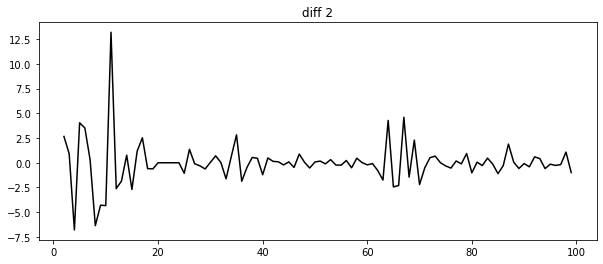

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.8
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.8] <class 'numpy.ndarray'>
标准差为27.72106052058556
PREDICTION_HORIZON:  6


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


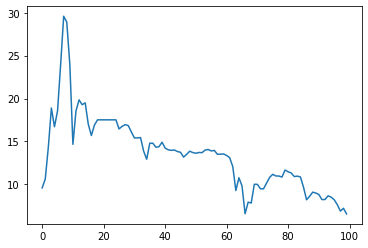

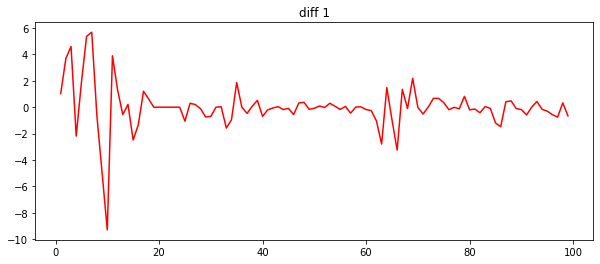

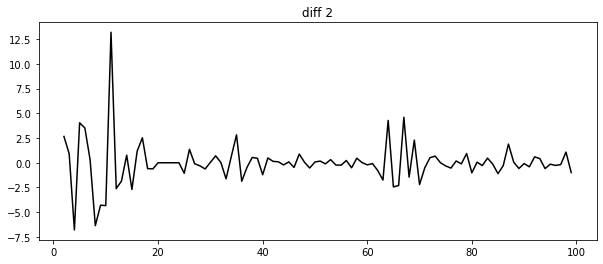

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.62
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.62] <class 'numpy.ndarray'>
标准差为25.858031955994463
PREDICTION_HORIZON:  7


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


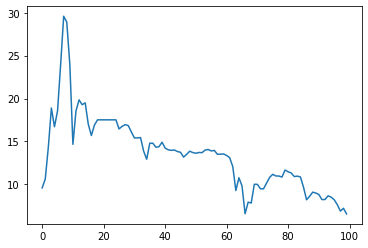

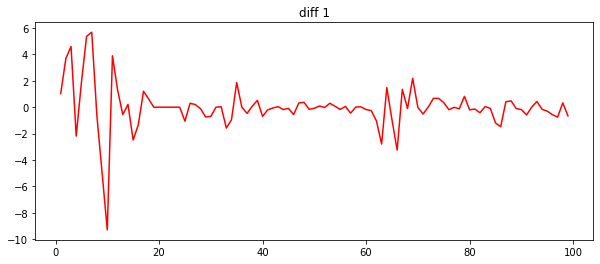

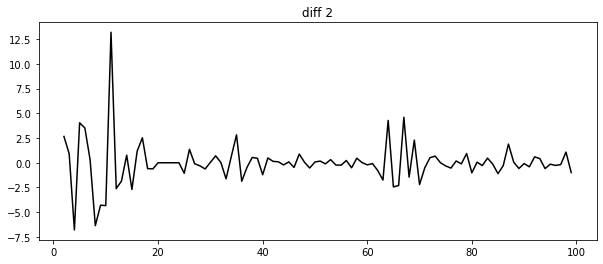

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.84
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.84] <class 'numpy.ndarray'>
标准差为18.533708176099672
PREDICTION_HORIZON:  8


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


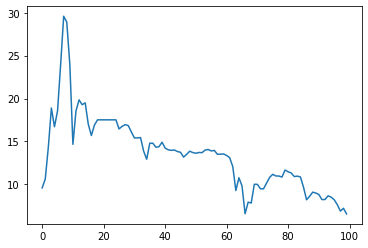

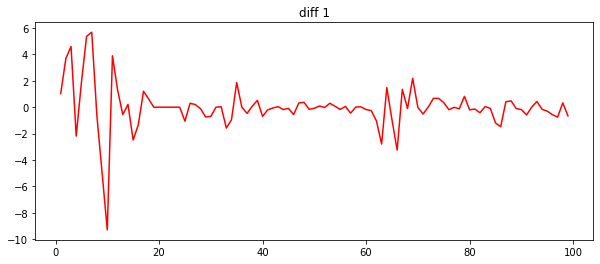

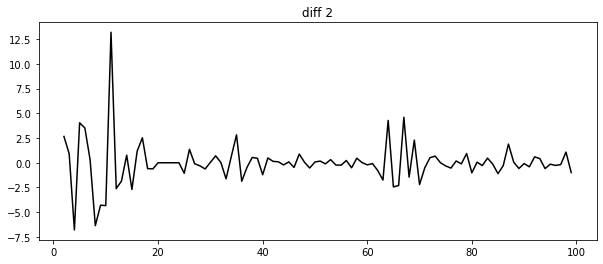

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.82
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.82] <class 'numpy.ndarray'>


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


标准差为18.36190500225622
PREDICTION_HORIZON:  9


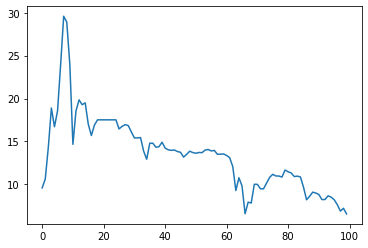

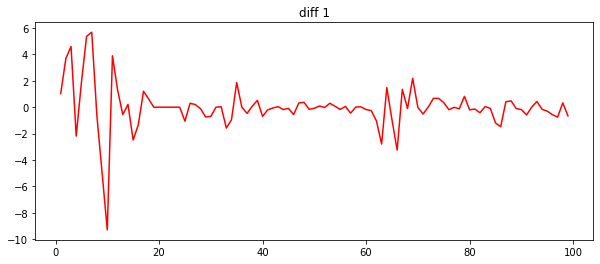

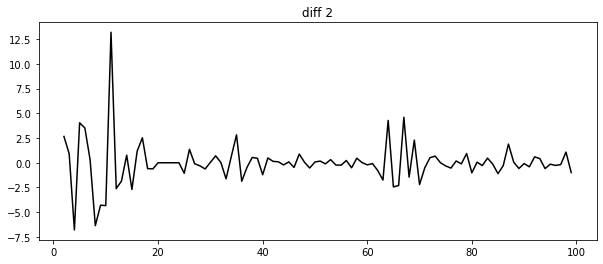

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  10


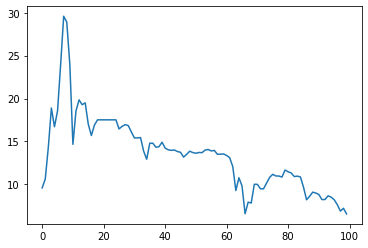

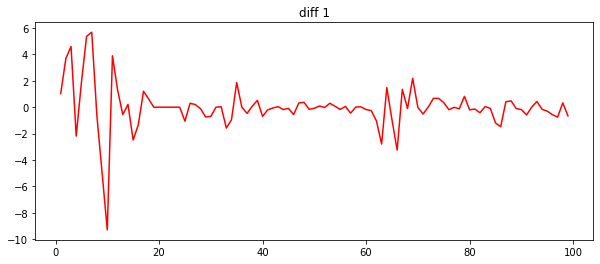

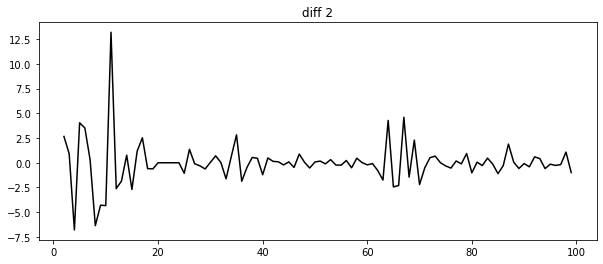

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.2


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.2] <class 'numpy.ndarray'>
标准差为21.762965305281888
PREDICTION_HORIZON:  11


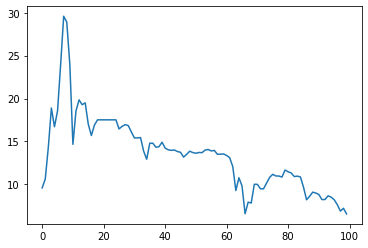

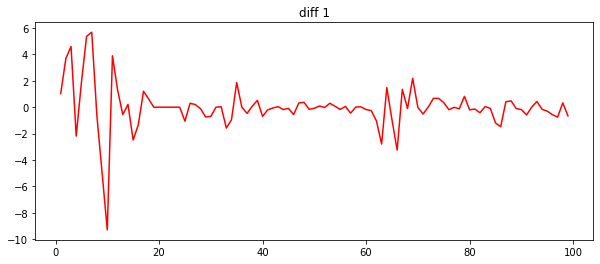

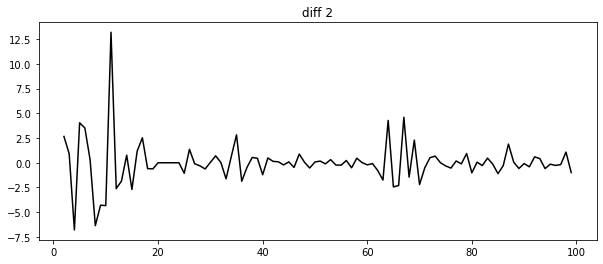

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.46


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.46] <class 'numpy.ndarray'>
标准差为24.256406565246813
PREDICTION_HORIZON:  12


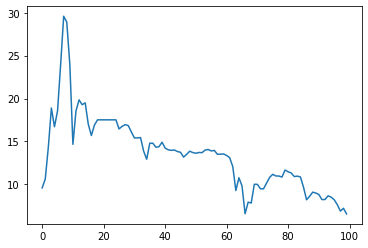

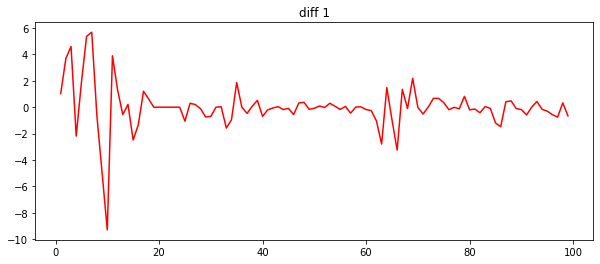

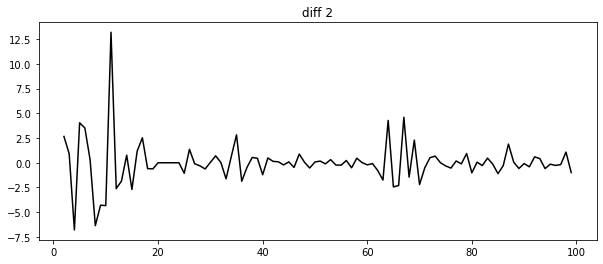

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  6.11


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[6.11] <class 'numpy.ndarray'>
标准差为31.081509715159132
PREDICTION_HORIZON:  13


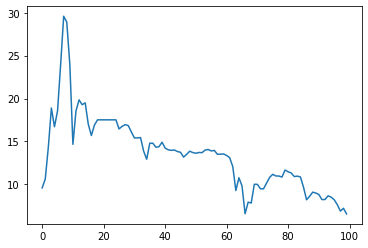

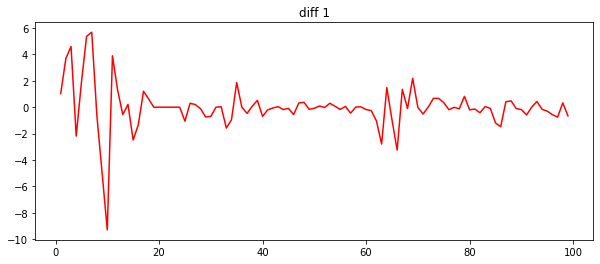

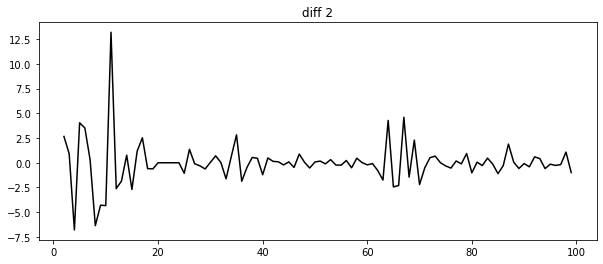

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.61
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.61] <class 'numpy.ndarray'>
标准差为25.756430369072735
PREDICTION_HORIZON:  14


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


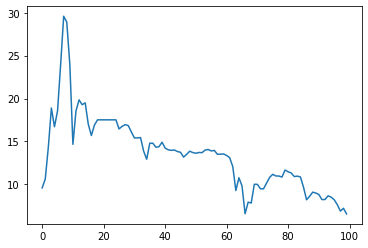

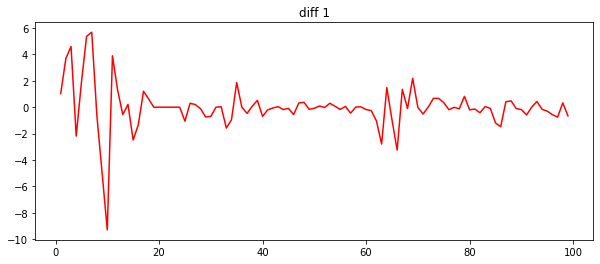

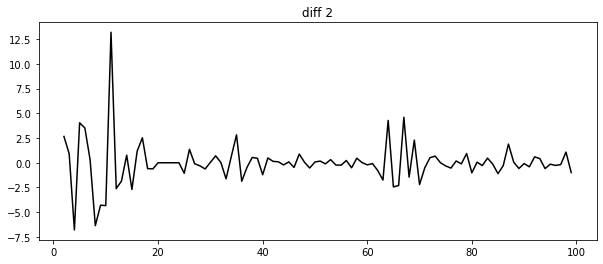

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.43


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.43] <class 'numpy.ndarray'>
标准差为23.961801804481617
PREDICTION_HORIZON:  15


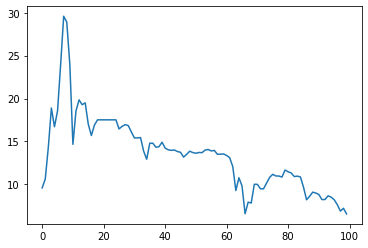

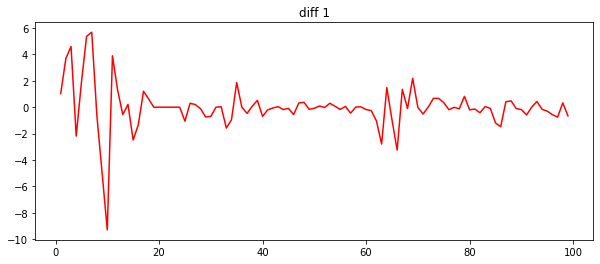

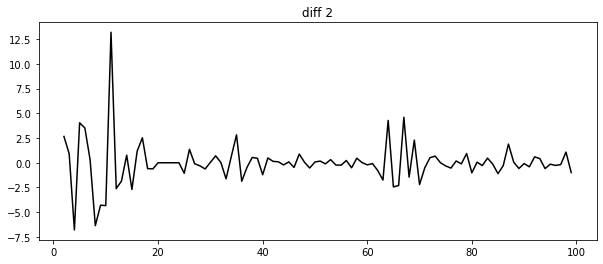

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.55
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.55] <class 'numpy.ndarray'>
标准差为25.151020847542362
PREDICTION_HORIZON:  16


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


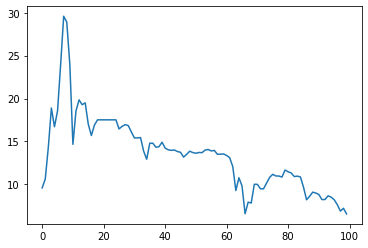

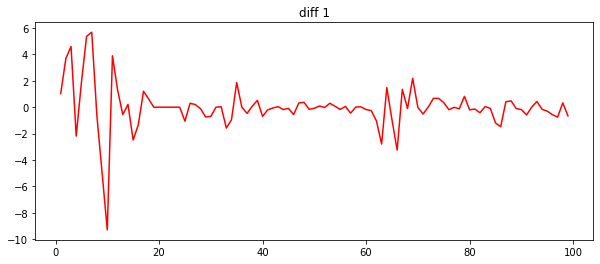

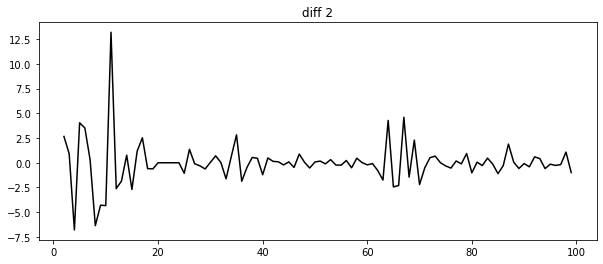

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.47
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.47] <class 'numpy.ndarray'>
标准差为24.355008152168537
PREDICTION_HORIZON:  17


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


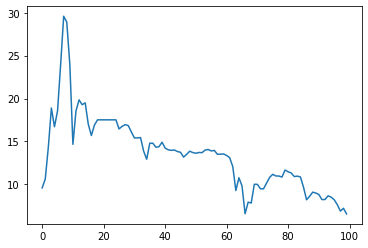

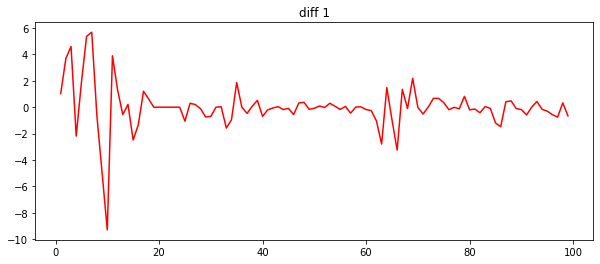

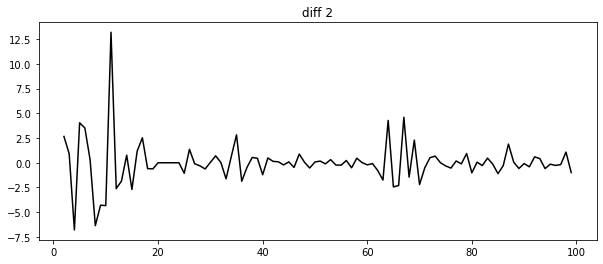

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.33
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.33] <class 'numpy.ndarray'>
标准差为22.99278593526434
PREDICTION_HORIZON:  18


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


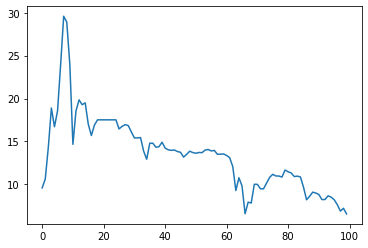

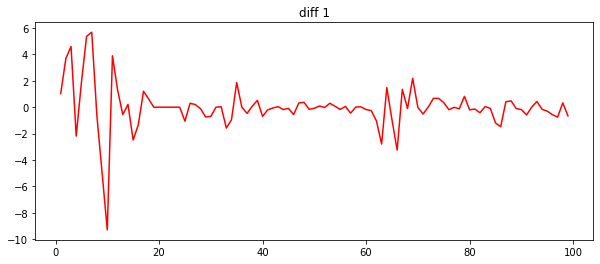

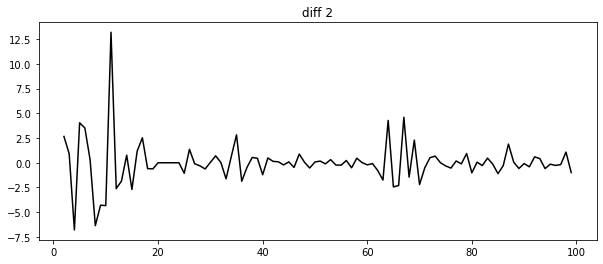

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  19


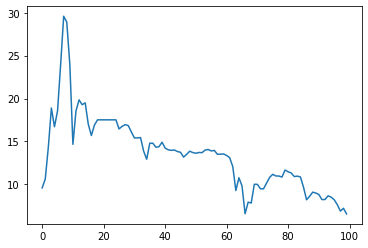

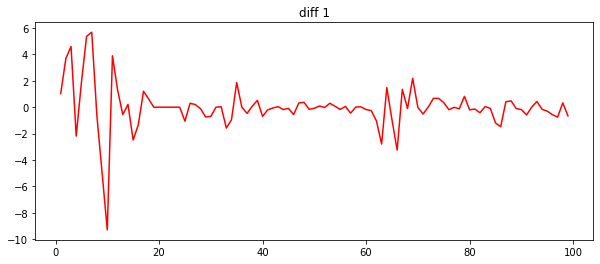

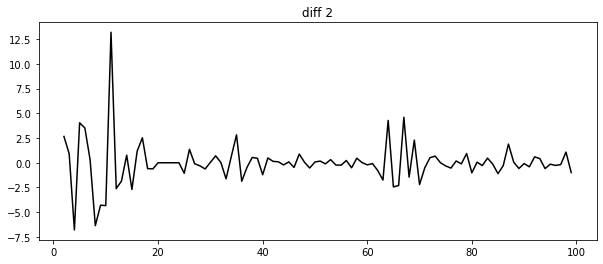

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.92
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.92] <class 'numpy.ndarray'>
标准差为19.228920871473495
PREDICTION_HORIZON:  20


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


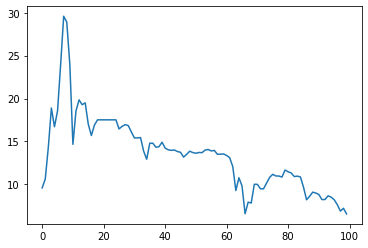

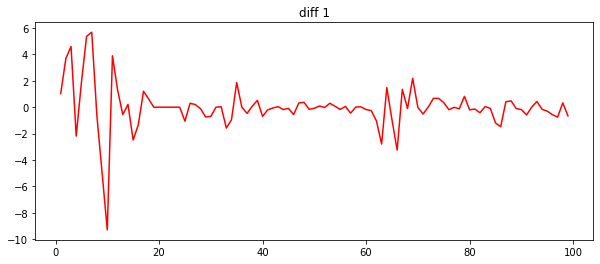

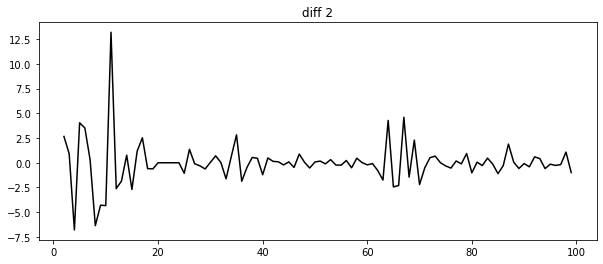

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.77
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.77] <class 'numpy.ndarray'>
标准差为17.935897067647574
PREDICTION_HORIZON:  21


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


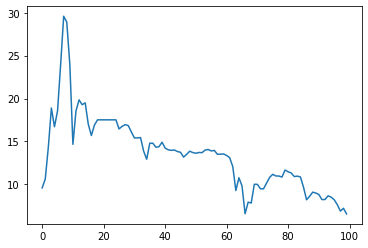

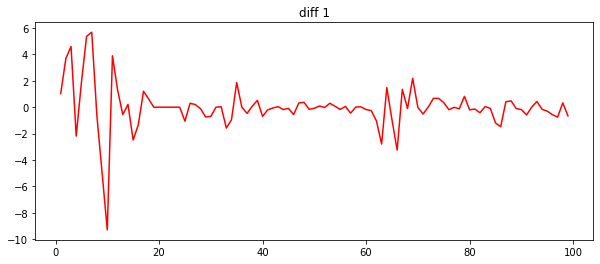

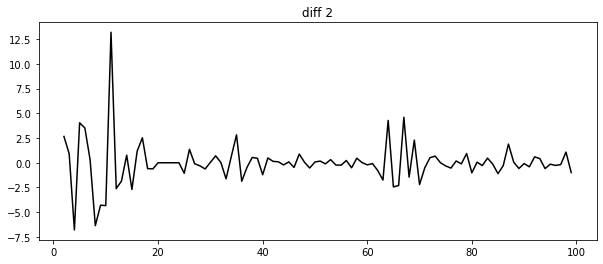

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.78
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.78] <class 'numpy.ndarray'>
标准差为18.020698654569316
PREDICTION_HORIZON:  22


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


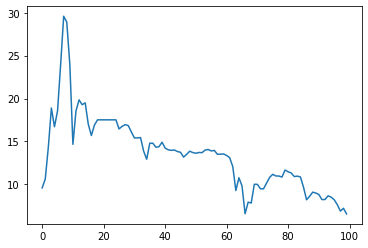

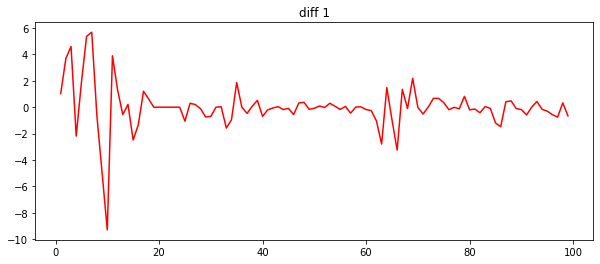

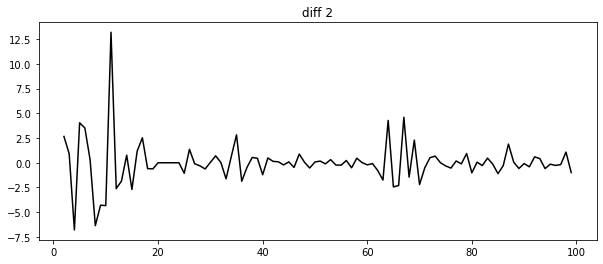

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.14
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.14] <class 'numpy.ndarray'>
标准差为21.206755783751515
PREDICTION_HORIZON:  23


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


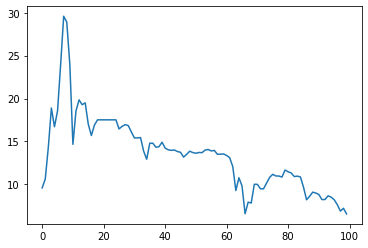

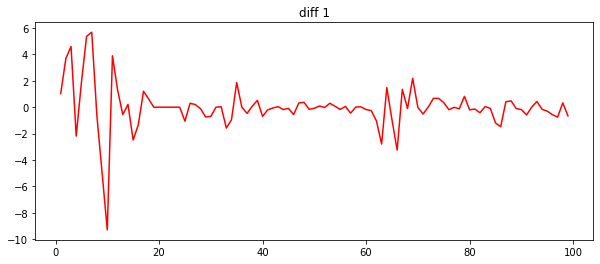

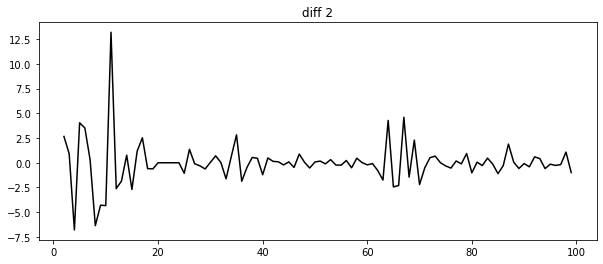

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  24


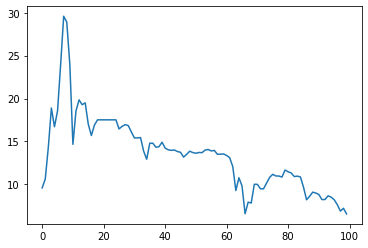

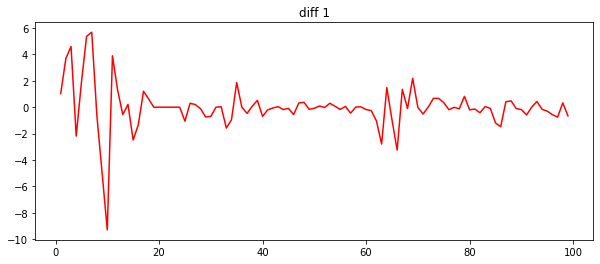

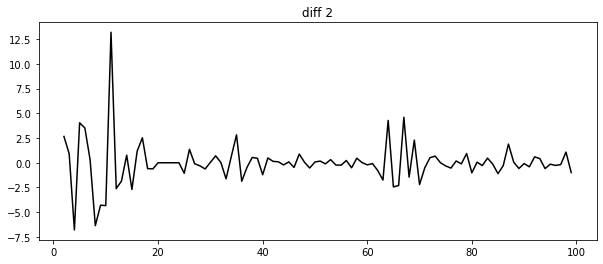

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.03
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.03] <class 'numpy.ndarray'>
标准差为20.205738327612515
PREDICTION_HORIZON:  25


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


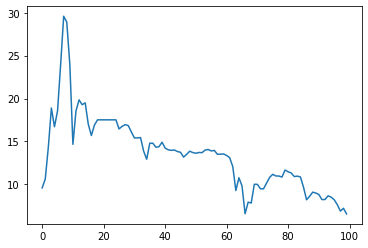

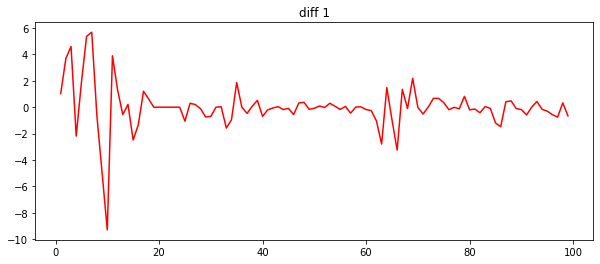

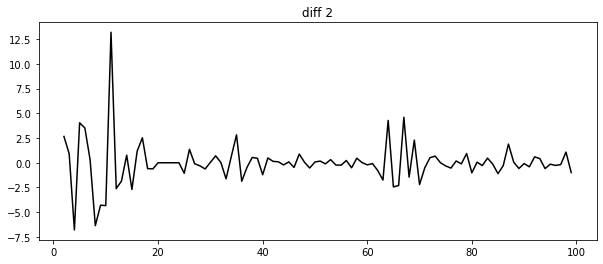

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  5.02
pred_one [0.53492065] <class 'numpy.ndarray'>
[5.02] <class 'numpy.ndarray'>
标准差为20.11593674069077
PREDICTION_HORIZON:  26


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


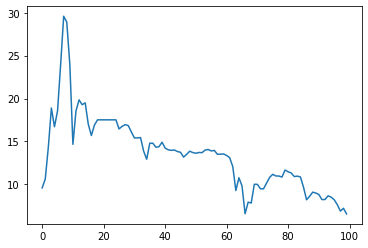

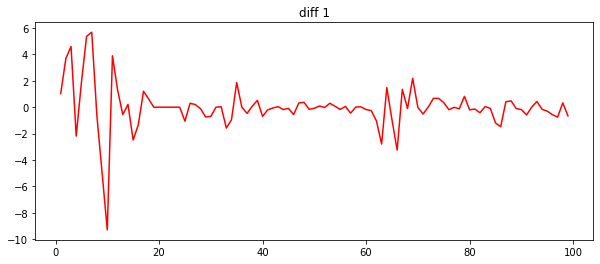

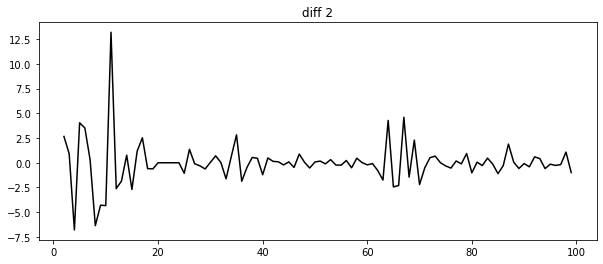

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.96
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.96] <class 'numpy.ndarray'>
标准差为19.581327219160414
PREDICTION_HORIZON:  27


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


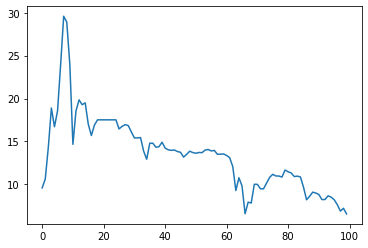

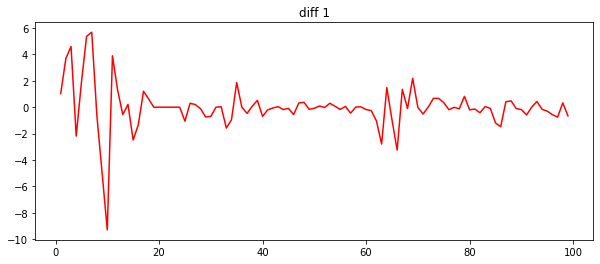

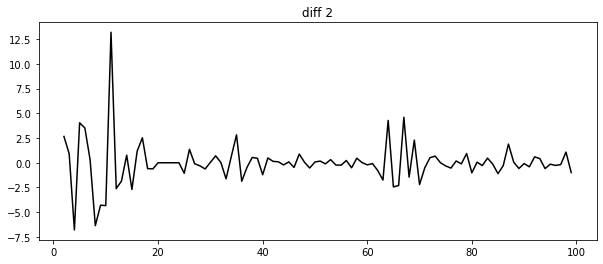

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.87
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.87] <class 'numpy.ndarray'>
标准差为18.792912936864866
PREDICTION_HORIZON:  28


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


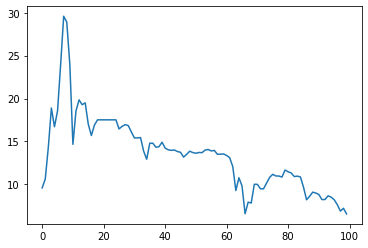

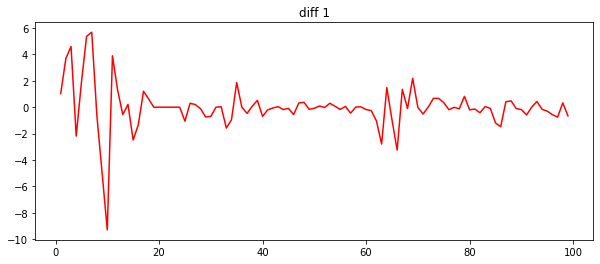

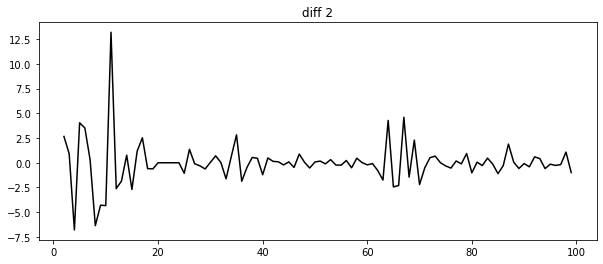

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.73
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.73] <class 'numpy.ndarray'>
标准差为17.59869071996067
PREDICTION_HORIZON:  29


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


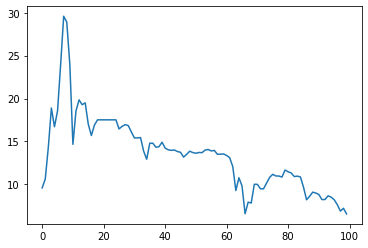

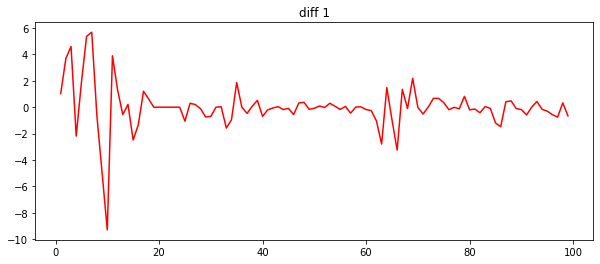

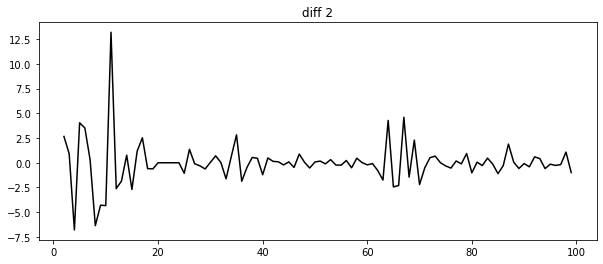

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.27
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.27] <class 'numpy.ndarray'>
标准差为13.950817721561181
PREDICTION_HORIZON:  30


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


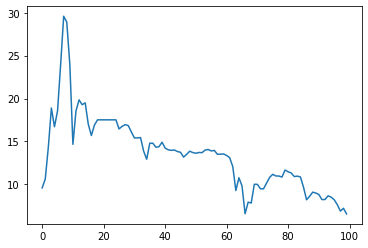

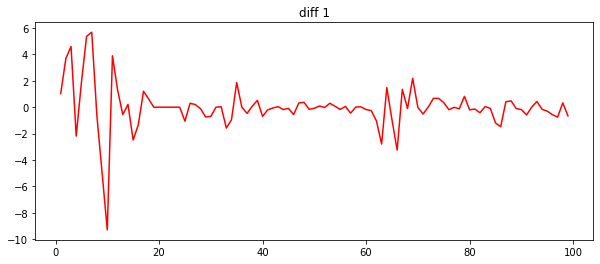

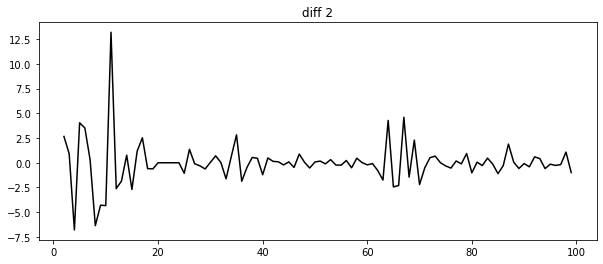

train:  0      9.57
1     10.60
2     14.29
3     18.89
4     16.70
      ...  
95     8.18
96     7.61
97     6.86
98     7.19
99     6.53
Name: price, Length: 100, dtype: float64
test:  4.01
pred_one [0.53492065] <class 'numpy.ndarray'>
[4.01] <class 'numpy.ndarray'>
标准差为12.076176461596257


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\wang.yuhao\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


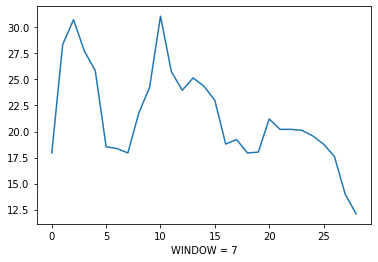

In [36]:
def string_toDatetime(string):
        return  datetime.datetime.strptime(string, "%Y-%m-%d %H:%M:%S")
     
def ARIMA_model(train_H,train,test,prediction_horizon):
        arima_model = ARIMA(train,order =(0,1,2)) #ARIMA模型
        result = arima_model.fit()
        #print(result.summary()) #给出一份模型报告
        ########得到训练集的预测时间序列#########
        #pred = result.forecast(30)
        pred_one = result.predict(100, dynamic=True).values
        #pred_one = 
        print("pred_one",pred_one, type(pred_one))
        test_arr = np.array([])
        test = np.append(test_arr,test)
        print(test, type(test))
        rmse = mean_squared_error(test,pred_one)
    #print(len(test))
    #print(pred_one[6:-1])
    #pred_one.plot()
    #test.plot()
        print('标准差为{}'.format(rmse)) 
        return rmse
        
def stationarity(timeseries): #Stationary treatment
    #Finite difference, and drop none value
    diff1 = timeseries.diff(1).dropna() 
    diff2 = diff1.diff(1) 
    
    diff1.plot(color = 'red',title='diff 1',figsize=(10,4))
    plt.show()
    diff2.plot(color = 'black',title='diff 2',figsize=(10,4))
    plt.show()
    return diff1

     
def determinate_order(timeseries): 
    plot_acf(timeseries,lags=40) 
    plot_pacf(timeseries,lags=40)
    plt.show()    
    
    AIC = sm.tsa.arma_order_select_ic(timeseries,max_ar = 6,max_ma=4,ic='aic')['aic_min_order']
    #BIC
    BIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
           max_ma=4,ic='bic')['bic_min_order']
    #HQIC
    HQIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
                 max_ma=4,ic='hqic')['hqic_min_order']
    print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))
    
    
def preprocess_data():
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    train = priced_bitcoin.loc[0:99, 'price']
    test = priced_bitcoin.loc[(99 + prediction_horizon), 'price']
    plt.plot(train)
    plt.show()

    return train, test
        
        
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    train, test = preprocess_data()
    train_finite = stationarity(train)
    print("train: ", train)
    print("test: ", test)

    #determinate_order(train_finite)
    return ARIMA_model( train, train_finite, test, prediction_horizon)

    

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = range(1,31)
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in range(2, 31):
            print("PREDICTION_HORIZON: ", prediction_horizon)
            rmse = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            #rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
        plt.plot(rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()


In [39]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15,5));
plt.plot(data.index,data['drivers']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

ModuleNotFoundError: No module named 'pyflux'

In [44]:
!pip install pyflux

  Using cached pyflux-0.4.15.tar.gz (1.3 MB)
  Running setup.py clean for pyflux
Failed to build pyflux
    Running setup.py install for pyflux: started
    Running setup.py install for pyflux: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\wang.yuhao\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\wang.yuhao\\AppData\\Local\\Temp\\pip-install-qq6x5nue\\pyflux\\setup.py'"'"'; __file__='"'"'C:\\Users\\wang.yuhao\\AppData\\Local\\Temp\\pip-install-qq6x5nue\\pyflux\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\wang.yuhao\AppData\Local\Temp\pip-wheel-7ntdfn7b'
       cwd: C:\Users\wang.yuhao\AppData\Local\Temp\pip-install-qq6x5nue\pyflux\
  Complete output (192 lines):
  running bdist_wheel
  running build
  running config_cc
  unifing config_cc, config, build_clib, build_ext, build commands --compiler options
  running config_fc
  unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
  running build_src
  build_src
  building ex

In [42]:
!python --version

Python 3.8.3
